# Layers


## Çiftli Birimsel (Pairwise Unitary)

Ağdaki temel birim, çiftli birimsel operatördür (fotonikte Mach-Zehnder interferometresi (MZI) bileşeni olarak bilinir) ve dört aşamadan oluşur:

1. **Hadamard dönüşümü, $H$:**

    $$
    H = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1 & 1 \\
    1 & -1
    \end{bmatrix}
    $$

    veya **Işık Ayırıcı dönüşümü, $B$:**

    $$
    B = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1 & i \\
    i & 1
    \end{bmatrix}
    $$

2. **Farklı faz kayması, $D(\theta)$:**

    $$
    R(\theta) = \begin{bmatrix}
    e^{i \theta / 2} & 0 \\
    0 & e^{-i \theta / 2}
    \end{bmatrix}
    $$

    veya **Üst faz kayması, $L(\theta)$:**

    $$
    L(\theta) = \begin{bmatrix}
    e^{i \theta} & 0 \\
    0 & 1
    \end{bmatrix}
    $$

3. **Hadamard dönüşümü, $H$** veya **Işık Ayırıcı dönüşümü, $B$:**

4. **Üst faz kayması, $L(\phi)$:**

Böylece, bir ağdaki $\ell$'nci katman ve giriş indeksi çiftleri $n, n+1$ için toplam birimsel dönüşüm (Hadamard konvansiyonunda):

$$
U(\theta_{n,\ell}, \phi_{n,\ell}) = H D(\theta_{n,\ell}) H L(\phi_{n,\ell})
= \begin{bmatrix}
e^{i \phi_{n,\ell}} \cos \frac{\theta_{n,\ell}}{2} & i \sin \frac{\theta_{n,\ell}}{2} \\
i e^{i \phi_{n,\ell}} \sin \frac{\theta_{n,\ell}}{2} & \cos \frac{\theta_{n,\ell}}{2}
\end{bmatrix}
$$

Bir ağdaki $\ell$'nci katman ve giriş çiftleri $n, n+1$ için toplam birimsel dönüşüm (Işık Ayırıcı konvansiyonunda, `neurophox`'ta varsayılan):

$$
U(\theta_{n,\ell}, \phi_{n,\ell}) = B D(\theta_{n,\ell}) B L(\phi_{n,\ell})
= i \begin{bmatrix}
e^{i \phi_{n,\ell}} \sin \frac{\theta_{n,\ell}}{2} & \cos \frac{\theta_{n,\ell}}{2} \\
e^{i \phi_{n,\ell}} \cos \frac{\theta_{n,\ell}}{2} & - \sin \frac{\theta_{n,\ell}}{2}
\end{bmatrix}
$$

Genellikle, ekstra bir küresel faz terimini ortadan kaldırdığı için $D(\theta)$ kullanılır; bu, üst ve alt satırların Bloch küresi gibi hareket etmesine neden olur, bu yüzden buna **"Bloch tabanı"** denir. Fotonik literatürde, genellikle $L(\theta)$ kullanılır, burada faz kayması $\theta$ ön tarafta küresel faz terimi olarak yer alır; buna **"tek modlu taban"** denir. Her iki taban da benzer şekilde davranır ve genellikle optimizasyon performansını etkilemez. `neurophox`'ta, ifadeyi basitleştirmek için Bloch tabanı varsayılan olarak kullanılır, ancak kullanıcı, tek modlu tabanı kullanmak isteyip istemediğini bir parametre olarak belirtebilir.


In [1]:
# core (tf, numpy, scipy, matplotlib, pbar) imports

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import unitary_group
from tqdm import tqdm_notebook as pbar
# Comment this out if you do not have latex (or associated requirements) installed
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'serif','serif':['Charter']})
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

import warnings
warnings.filterwarnings('ignore')

# neurophox imports
from neurophox.numpy import *
from neurophox.tensorflow import *

### Rectangular mesh

$N = 8$ için bir dikdörtgen ağını başlatarak başlayalım. $L = N$ katmanlarından oluşan standart bir dikdörtgen ağında rastgele bir birimsel matris uygulamak için başlatılan bir model, aşağıdaki komutla kolayca oluşturulabilir:


In [37]:
N = 8
np_layer = RMNumpy(N)

tf_layer = RM(N)

### Plotting options


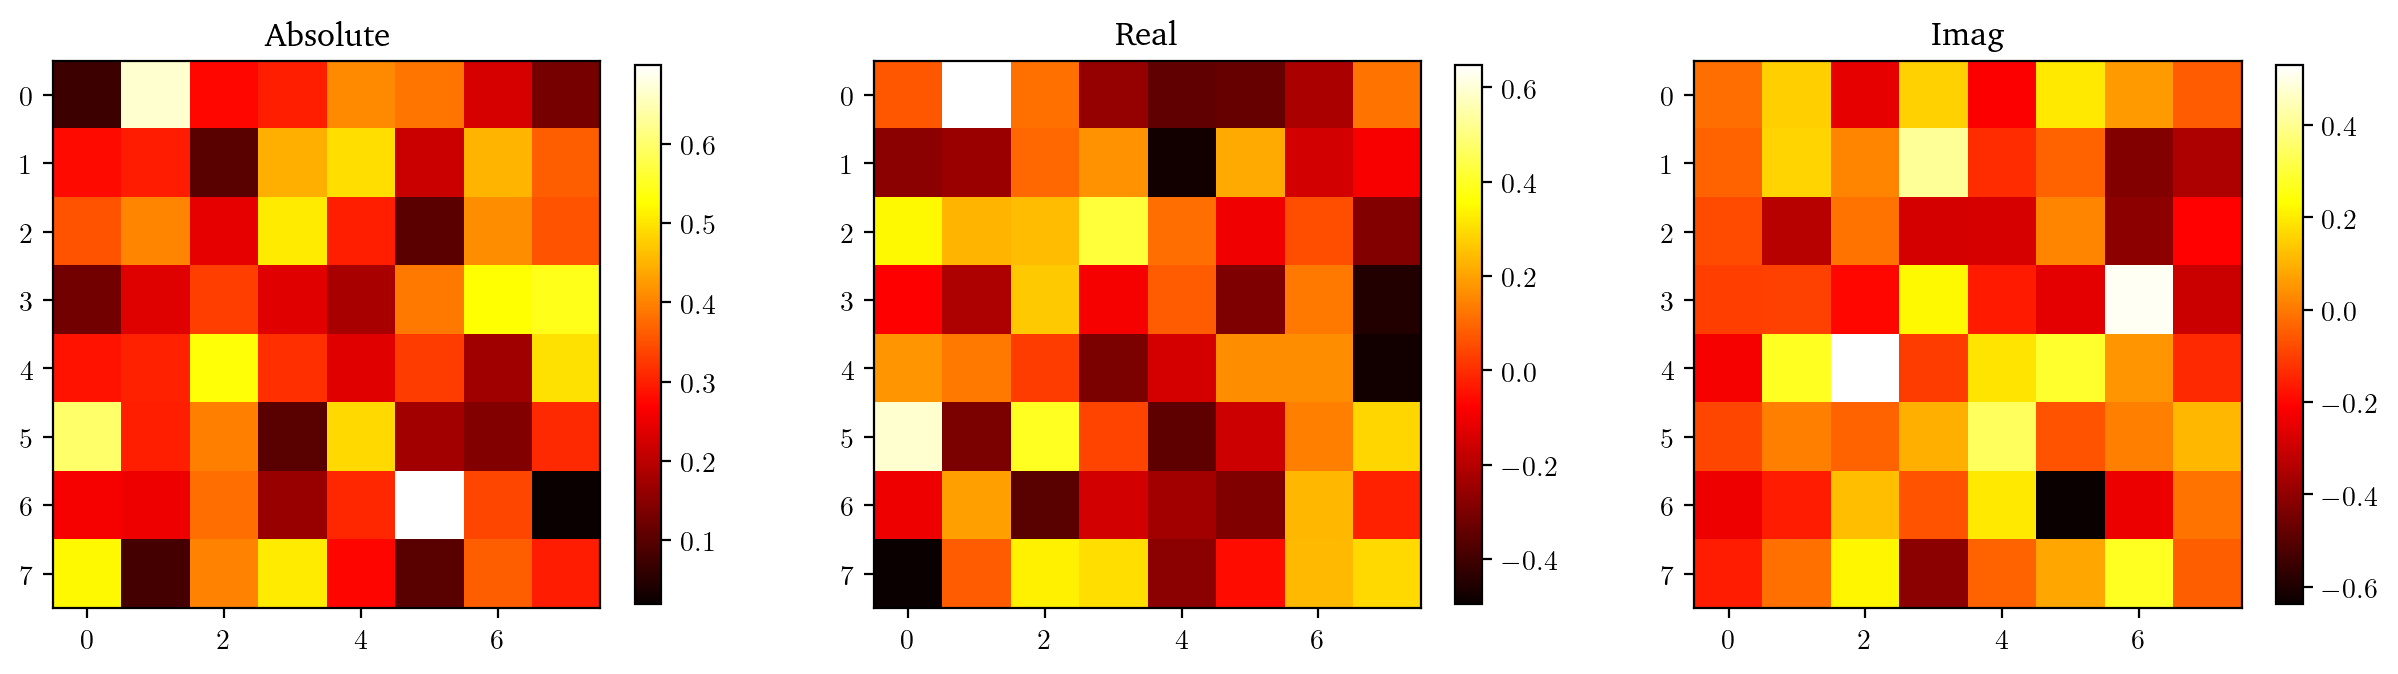

In [38]:
tf_layer.plot(plt)

Yukarıdaki aynı aracı, tüm dikey katman operatörlerini $U^{(\ell)}_{N}$ görselleştirmek için de kullanmak mümkündür. Bunu sadece ilk katman için göstereceğiz, ancak bu genellikle yeni bir ağ katmanı uygulandığında tanılama için faydalıdır.


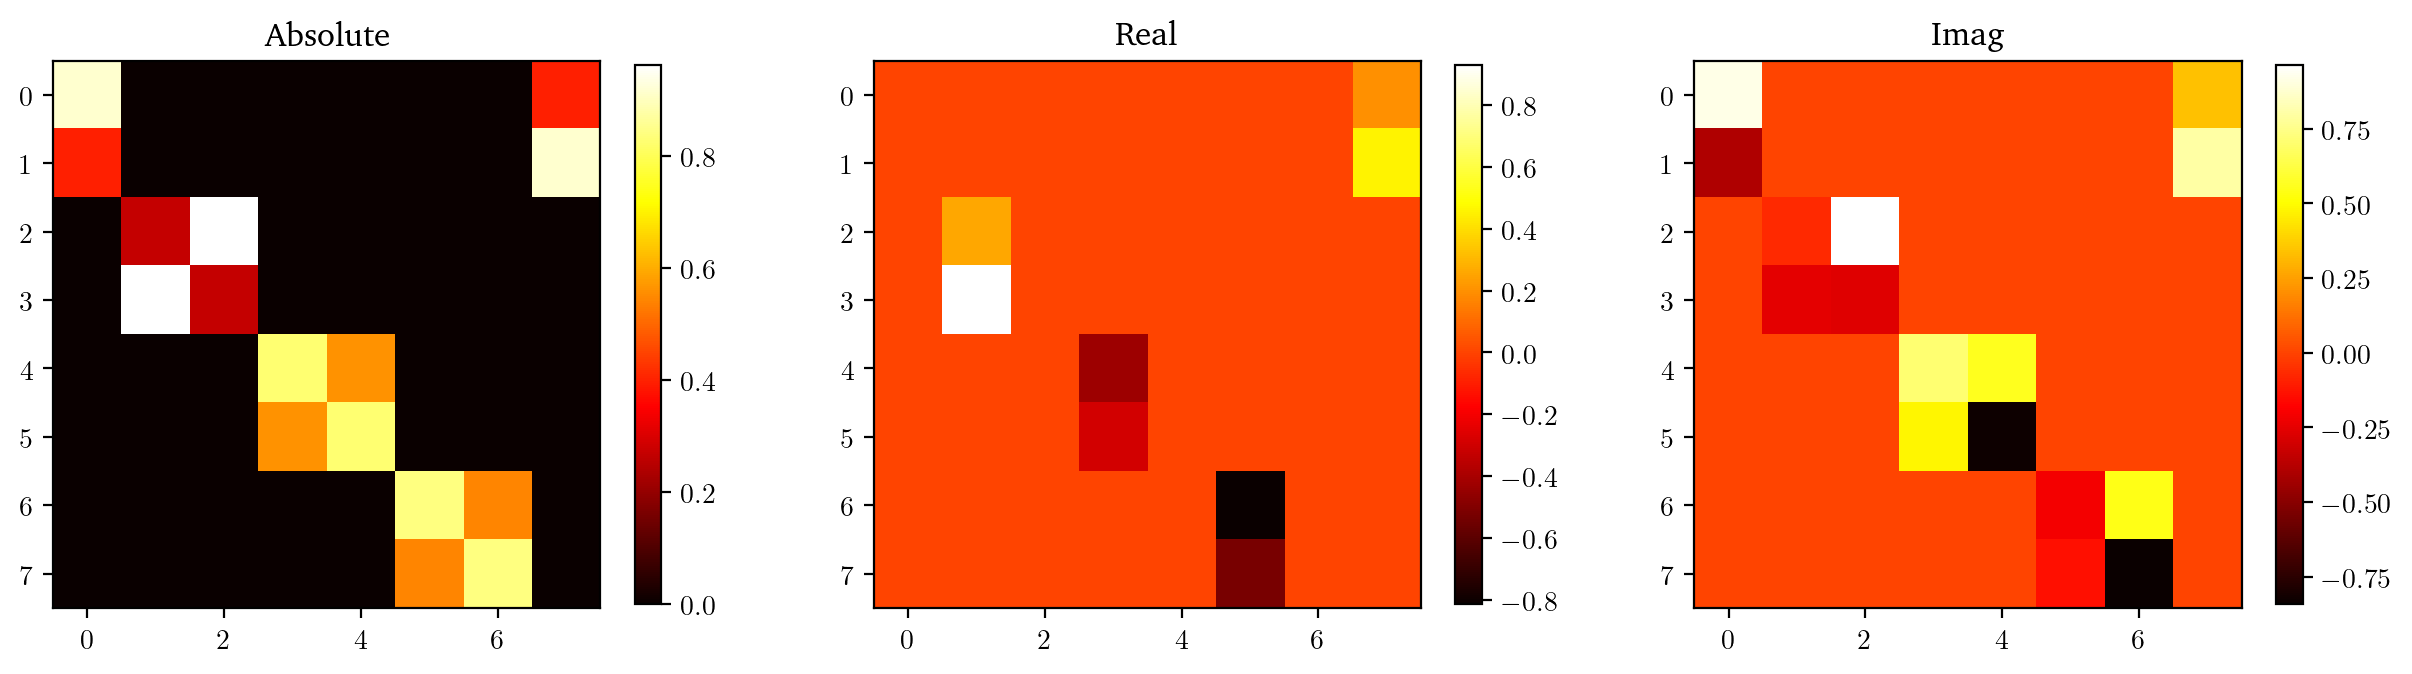

In [39]:
np_layer.mesh_layers[0].plot(plt)

## Propagasyon görselleştirmesi

Fotonik simülasyonlar için, ışığın ağda nasıl yayıldığını görmek faydalıdır. Işığın propagasyonu ile kastettiğimiz şey, tek bir giriş portundan (bir Öklidyen standart temel vektör girişine karşılık gelir) geçirilen ışığın ağda nasıl yayıldığıdır. Bu, makine öğrenimi uygulamaları için de bazı faydalar sağlayabilir.

[Makalemizin Şekil 2'sinde](https://arxiv.org/abs/1808.00458), başlatmanın ağda ışığın nasıl yayıldığı üzerinde güçlü bir etkisi olduğunu gösterdik. Bunu, $N = 64$ boyutlu bir ağda giriş 31'e (sıfır indeksli) enjekte edilen ışığın yayılma büyüklüklerini, Haar ile başlatılmış bir ağ ile eşit dağılmış rastgele başlatılmış $\theta_{n\ell}$'yi karşılaştırarak gösteriyoruz.


Text(0.5, 1.0, 'Propagation for uniform random $\\theta_{n\\ell}$')

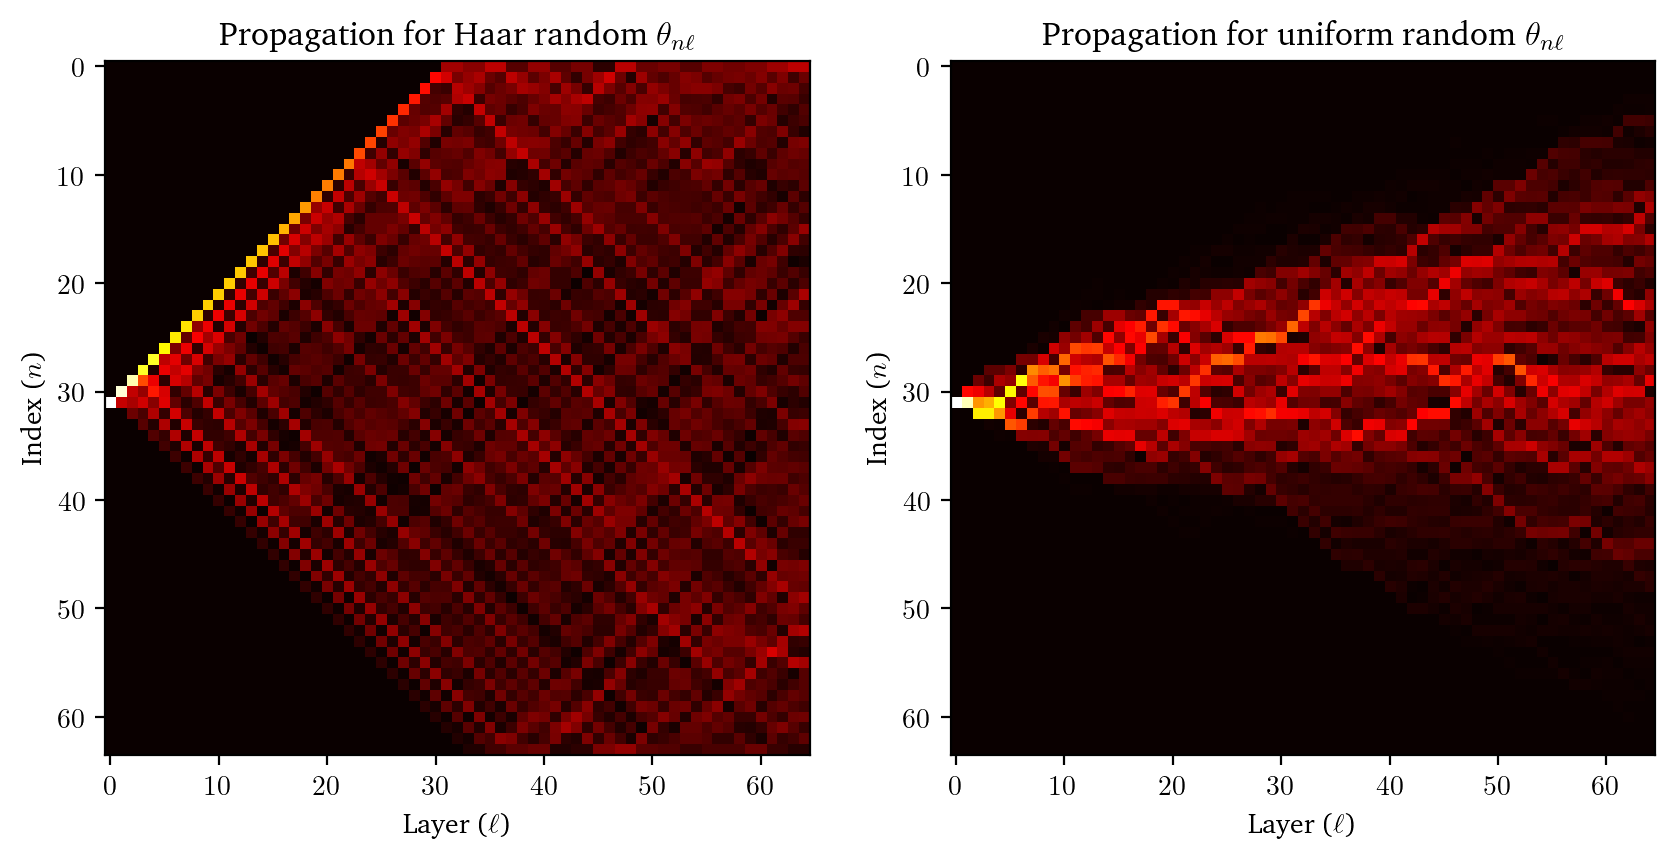

In [40]:
haar_random_layer = RMNumpy(64)  # note: theta_init_name="haar_rect"
uniform_random_layer = RMNumpy(64, theta_init_name="random_theta")

plt.figure(dpi=200, figsize=(10, 5))
plt.subplot(121)
plt.imshow(np.abs(haar_random_layer.propagate(np.eye(64)[31]).squeeze()).T, cmap='hot')
plt.ylabel("Index ($n$)")
plt.xlabel("Layer ($\ell$)")
plt.title('Propagation for Haar random $\\theta_{n\ell}$')
plt.subplot(122)
plt.imshow(np.abs(uniform_random_layer.propagate(np.eye(64)[31]).squeeze()).T, cmap='hot')
plt.ylabel("Index ($n$)")
plt.xlabel("Layer ($\ell$)")
plt.title('Propagation for uniform random $\\theta_{n\ell}$')

Özellikle, yukarıda gösterilenler gibi propagasyon desenlerini üreten $\theta_{n\ell}$ değerlerinin ne olduğunu düşünmek faydalıdır. Bu desenleri göstermek için, yukarıdaki matrisler için her birinin "mutlak $\theta_{n\ell}$" değerini bulan bazı özel araçlarımız bulunmaktadır (bkz. [Ek F](https://arxiv.org/abs/1808.00458)). Çoğu mutlak $\theta_{n\ell}$ değerinin sıfıra yakın olduğunu fark edin (burada Beamsplitter konvansiyonunu varsayıyoruz, ancak Hadamard konvansiyonunda $\theta_{n\ell}$ değerlerinin bunun yerine $\pi$'ya yakın olabileceğini de göz önünde bulundurmalıyız).


Text(0.5, 0, 'Layer ($\\ell$)')

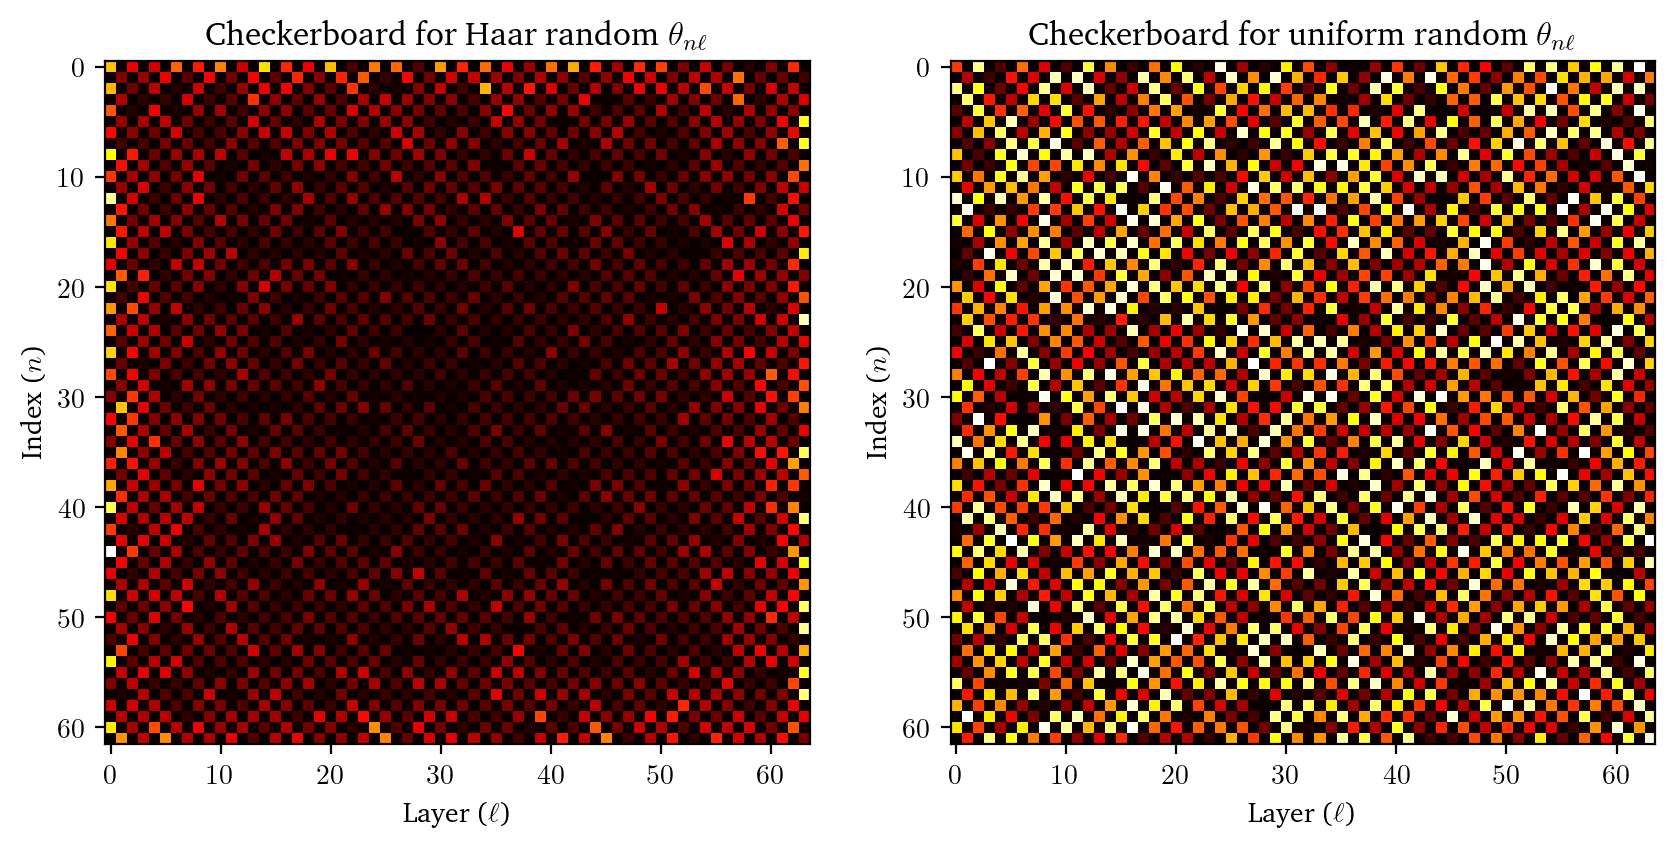

In [41]:
from neurophox.helpers import to_absolute_theta

plt.figure(dpi=200, figsize=(10, 5))
plt.subplot(121)
plt.imshow(np.abs(to_absolute_theta(haar_random_layer.phases.theta.checkerboard_arrangement[:-2])), cmap='hot')
plt.title('Checkerboard for Haar random $\\theta_{n\ell}$')
plt.ylabel("Index ($n$)")
plt.xlabel("Layer ($\ell$)")
plt.subplot(122)
plt.imshow(np.abs(to_absolute_theta(uniform_random_layer.phases.theta.checkerboard_arrangement[:-2])), cmap='hot')
plt.title('Checkerboard for uniform random $\\theta_{n\ell}$')
plt.ylabel("Index ($n$)")
plt.xlabel("Layer ($\ell$)")

### Triangular mesh

Yukarıdaki aynı analizleri yapalım, ancak bu sefer üçgen ağı için.


Text(0.5, 0, 'Layer ($\\ell$)')

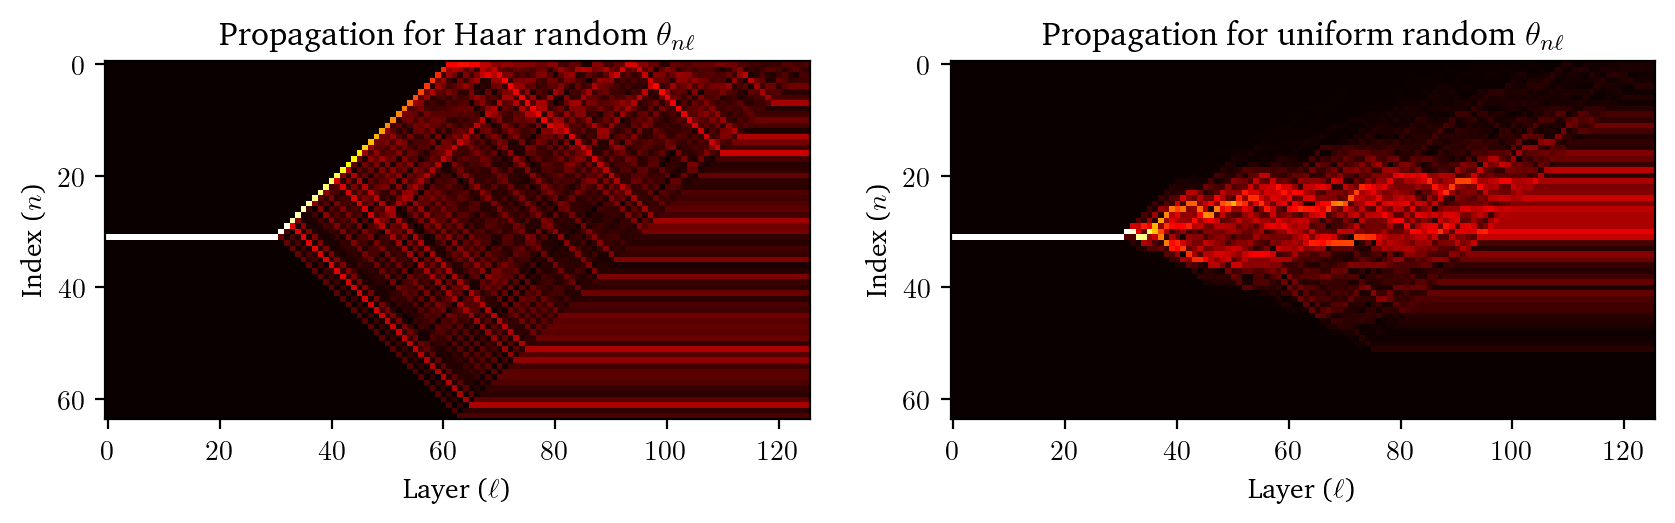

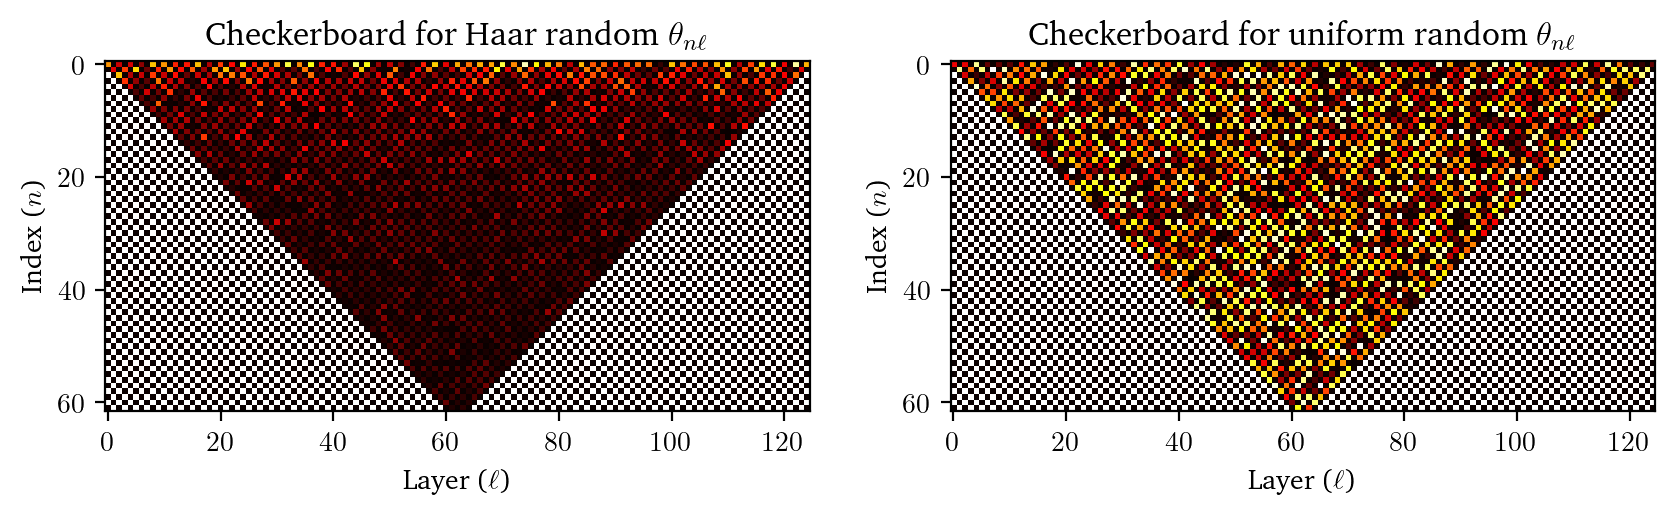

In [42]:
haar_random_layer = TMNumpy(64)  # note: theta_init_name="haar_rect"
uniform_random_layer = TMNumpy(64, theta_init_name="random_theta")

plt.figure(dpi=200, figsize=(10, 5))
plt.subplot(121)
plt.imshow(np.abs(haar_random_layer.propagate(np.eye(64)[31]).squeeze()).T, cmap='hot')
plt.ylabel("Index ($n$)")
plt.xlabel("Layer ($\ell$)")
plt.title('Propagation for Haar random $\\theta_{n\ell}$')
plt.subplot(122)
plt.imshow(np.abs(uniform_random_layer.propagate(np.eye(64)[31]).squeeze()).T, cmap='hot')
plt.ylabel("Index ($n$)")
plt.xlabel("Layer ($\ell$)")
plt.title('Propagation for uniform random $\\theta_{n\ell}$')

plt.figure(dpi=200, figsize=(10, 5))
plt.subplot(121)
plt.imshow(np.abs(to_absolute_theta(haar_random_layer.phases.theta.checkerboard_arrangement[:-2])), cmap='hot')
plt.title('Checkerboard for Haar random $\\theta_{n\ell}$')
plt.ylabel("Index ($n$)")
plt.xlabel("Layer ($\ell$)")
plt.subplot(122)
plt.imshow(np.abs(to_absolute_theta(uniform_random_layer.phases.theta.checkerboard_arrangement[:-2])), cmap='hot')
plt.title('Checkerboard for uniform random $\\theta_{n\ell}$')
plt.ylabel("Index ($n$)")
plt.xlabel("Layer ($\ell$)")

Bu `propagate` işlevselliğinin, üçgen ve dikdörtgen gibi ızgara benzeri, yerel etkileşimli ağ yapıları için faydalı olduğu önemli bir nokta, ancak yerel olmayan etkileşimler tanıtıldığında, özellikle her dikey katmanın bu tür yerel olmayan etkileşimlere sahip olması durumunda, daha az anlaşılır hale gelmesidir.


# **Matris Optimizasyonu**


Bu not defteri, [üniter ağlar üzerinde optimizasyon](https://arxiv.org/abs/1808.00458) için tüm büyük ölçekli (birkaç saat süren) deneylerin çalıştırılmasına yönelik bir kılavuzdur. Bu simülasyonlar, üniter ağlar için optimizasyon alanını keşfetmek olarak veya [fotonik _in situ_ geri yayılımını](https://www.osapublishing.org/optica/abstract.cfm?uri=optica-5-7-864) simüle etmenin bir yolu olarak görülebilir (otomatik türev alma kullanılarak, gradyan ölçümü yerine).

Bu deneyler, esasen fotonik mimarilerin optimizasyonunu anlamak için yapılmış olup, daha genel makine öğrenimi görevleri için de faydalı olabilir.

Bu not defterinde, [makalede](https://arxiv.org/abs/1808.00458) iki ana deney ve bir ek deney tekrarlanacaktır:

1. **Dikdörtgen versus permütasyonlu dikdörtgen ağlar**: Bir üniter ağda parametre sayısı sabit tutulduğunda, yerel olmayan etkileşimler optimizasyon performansını iyileştirebilir.
2. **Dikdörtgen versus yedekli dikdörtgen ağlar**: Yedekli bir mimari, dikdörtgen mimariden çok daha hızlı bir şekilde bir matris öğrenir.
3. **Tekil değer ayrışımı (SVD) mimarileri**: Tekil değer ayrışımı mimarisi de öğrenilebilir, ancak bu, kazanç ve kayıp elemanlarının, [_in situ_ geri yayılım makalesindeki](https://www.osapublishing.org/optica/abstract.cfm?uri=optica-5-7-864) prosedürdeki doğrusal olmayanlar gibi ele alınmasını gerektirir.

**Not**: Hedef matris ve başlatmanın rastgeleliği nedeniyle, kağıtta gösterilenlere kıyasla eğriler arasında çok fazla farklılık olabilir, ancak genel eğilimlerin uyuşması beklenir.


In [43]:
# core (tf, numpy, scipy, matplotlib, pbar) imports

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import unitary_group
from tqdm import tqdm_notebook as pbar
import pickle

# comment this out if you do not have latex (or associated requirements) installed
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'serif','serif':['Charter']})
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams.update({'text.latex.preamble' : r'\usepackage{siunitx} \usepackage{amsmath}'})
import warnings
warnings.filterwarnings('ignore')

# neurophox imports
from neurophox.tensorflow import *
from neurophox.ml import LinearMultiModelRunner
from viz import MOResultsVisualizer

## Problem Tanımı

_Training loss_ (eğitim kaybı) şu şekilde tanımlanır (ML (makine öğrenimi) bağlamlarında tipik olarak sağa çarpma kullanıldığını ve bu konvansiyonun, makalemizde kullanılan soldan çarpma konvansiyonundan farklı olduğunu unutmayın):

$$ \|X \hat A - X A \|\_F^2, $$

Burada $X \in \mathbb{C}^{2N \times N}$, $2N$ karmaşık vektörden oluşan normalize edilmiş rastgele sentetik bir veri setini temsil eder. $\hat A = \hat U$ (üniter matris optimizasyonu için) veya $\hat A = \hat U \hat \Sigma \hat V$ (herhangi bir doğrusal matris SVD optimizasyonu için), $\hat U \in \mathbb{C}^{M \times M}$, $\hat V \in \mathbb{C}^{N \times N}$, tahmin edilen üniter matrisleri temsil eder. $\hat \Sigma \in \mathbb{C}^{M \times N}$, tahmin edilen tekil değer matrisini temsil eder (bu matris, $\min(M, N)$ `tensorflow` değişkeni ile parametrik hale getirilmiştir) ve $A = U$ (üniter) veya $\hat A = U \Sigma V$ (SVD), modellemeye çalıştığımız gerçek karmaşık matrisi ifade eder.

_Test loss_ (test kaybı), $X = I^{N \times N}$, yani $N \times N$ kimlik matrisine sahip kayıp olarak tanımlanır. Bu, şu şekilde sadeleşir:

$$ \|\hat A - A\|\_F^2 $$

**Eğitim öncesi önemli noktalar**:

1. Bu modelleri yalnızca GPU üzerinde test ettik. Modeller CPU'da daha yavaş çalışmaktadır, ancak bu cihazlarda tam olarak çalıştırmadık.
2. Tensorflow 2'nin `tf.function` aracını kullanıyoruz, bu da GPU üzerinde üniter katmanların hızlı bir şekilde uygulanabilmesi için başta statik bir grafik oluşturulması adına zaman harcandığı anlamına gelir. Muhtemelen ilerleme çubuğu hareket etmeye başlamadan önce bir iki dakika beklemeniz gerekecek.
3. Tensorboard sonuçlarını görselleştirmek için bir `logdir`'e ihtiyacınız var. `/data/tensorboard/neurophox` gibi bir şey işinizi görecektir. Çalıştırmadan önce, yeni çalıştırma için karışık tensorboard sonuçları almamak adına, herhangi bir önceki çalışmanın kopyasını oluşturan klasörleri silmeniz tavsiye edilir ya da `experiment_name`'inize zaman damgası ekleyerek geçmiş deneylerin üzerine yazılmasını engelleyebilirsiniz.

`LinearMultiModelRunner` sınıfı, bu problemi tanımlar ve bir liste halinde `layers` (katmanlar) ve ilgili `layer_names` (katman isimleri) ile diğer görselleştirme seçeneklerini kabul eder. `LinearMultiModelRunner` sınıfına benzer bir sınıf, diğer sinir ağı modellerini çalıştırmak için de kullanılabilir.


## Parametreleri Ayarlama

Hedef üniter matrisi ve optimizasyonları çalıştırıp çalıştırmayacağınızı belirlemek için `RUN_OPTIMIZATION` global değişkenini ayarlayın. Bu değişken yalnızca bu not defteri için geçerlidir ve `data/` klasöründe deneyler oluşturmak ya da mevcut deneyleri üzerine yazmak isteyip istemediğinizi belirtmek için kullanılır.


In [44]:
N = 128
target = unitary_group.rvs(N)
# Set to True if you haven't run the optimization yet to generate result pickle file.
RUN_OPTIMIZATION = True

## Deney 1: Nonlocalitelerin Eklenmesi (PRM) ([Şekil 6](https://arxiv.org/pdf/1808.00458))

Permutasyonlu dikdörtgen ağlar (PRM), orijinal dikdörtgen ağ yapısına nonlocaliteler eklemeyi içerir. Bu deney, NVIDIA GTX1080 GPU üzerinde yaklaşık 3.5 saat sürer. Sonuçlar değişkenlik gösterebilir.

**Eğitimden önce önemli not**: Modelinizin durumu kaydedilebilmesi için bir veri yolu oluşturduğunuzdan emin olun. `/data/tensorboard/neurophox` gibi bir yol yeterli olacaktır. Çalıştırma sırasında, `*.jl` dosyanızdaki model adlarının tümü kaydedilen veriler için klasör adı olacaktır. Çalıştırmadan önce, yeni çalışma için karışıklığa yol açabilecek herhangi bir klasörü silmeniz önerilir, böylece yanlış tensorboard sonuçları almazsınız.


## Experiment


In [45]:
if RUN_OPTIMIZATION:
    layers = [
        RM(N), RM(N, bs_error=0.1), RM(N, theta_init_name="random_theta"),
        PRM(N), PRM(N, bs_error=0.1), PRM(N, theta_init_name="random_theta")
    ]

    layer_names = [
        "rm-default", "rm-error", "rm-rand", "prm-default", "prm-error", "prm-rand"
    ]

    mr = LinearMultiModelRunner(experiment_name=f"rm-prm-{N}",
                                layer_names=layer_names,
                                layers=layers,
                                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0025),
                                batch_size=2 * N,
                                iterations_per_epoch=100,
                                iterations_per_tb_update=5,
                                logdir="/data/tensorboard/neurophox/")

    mr.run(200, target, pbar)
    mr.save("data/")

with open('data/rm-prm-128.p', 'rb') as f:
    rm_prm_results = pickle.load(f)

  0%|          | 0/20000 [00:00<?, ?it/s]

ValueError: not enough values to unpack (expected 2, got 0)

### Plotting (Figure 6a)


In [ ]:
plt.figure(dpi=200)

for name in ["rm-default", "prm-default", "rm-error", "prm-error", "rm-rand", "prm-rand"]:
    if 'rand' in name:
        linestyle = 'dotted'
    elif 'error' in name:
        linestyle = '--'
    else:
        linestyle = '-'
    if 'prm' in name:
        color=[0, 0.4, 0]
    elif 'rm' in name:
        color=[0.7, 0, 0]
    plt.plot(200 * np.arange(100), np.asarray(rm_prm_results['losses'][name][::200]), linestyle=linestyle, color=color)
plt.xlabel('Iteration')
plt.ylabel(r'Mean square error eost: $\frac{1}{2N}\left\lVert\hat U - U\right\rVert_F^2$')
plt.legend([r'\textbf{RM}', r'\textbf{PRM}',
            r'\textbf{RM} ($\sigma_\epsilon = 0.1$)', r'\textbf{PRM} ($\sigma_\epsilon = 0.1$)',
            r'\textbf{RM} (uniform $\theta_{n\ell}$ init)', r'\textbf{PRM} (uniform $\theta_{n\ell}$ init)'],
           ncol=3, fontsize=8.5)
plt.text(-0.17, 1.05, r'(\textbf{a})', transform=plt.axes().transAxes, size=13)
plt.yscale('log')
plt.savefig('data/figures/6a_rm_prm_optimization.pdf', bbox_inches='tight', pad_inches=0.05)

NameError: name 'rm_prm_results' is not defined

<Figure size 1280x960 with 0 Axes>

![Figure 6a: Deney Sonuçları](image/figure6a.png)


### Plotting (Figure 6b-e)


NameError: name 'rm_prm_results' is not defined

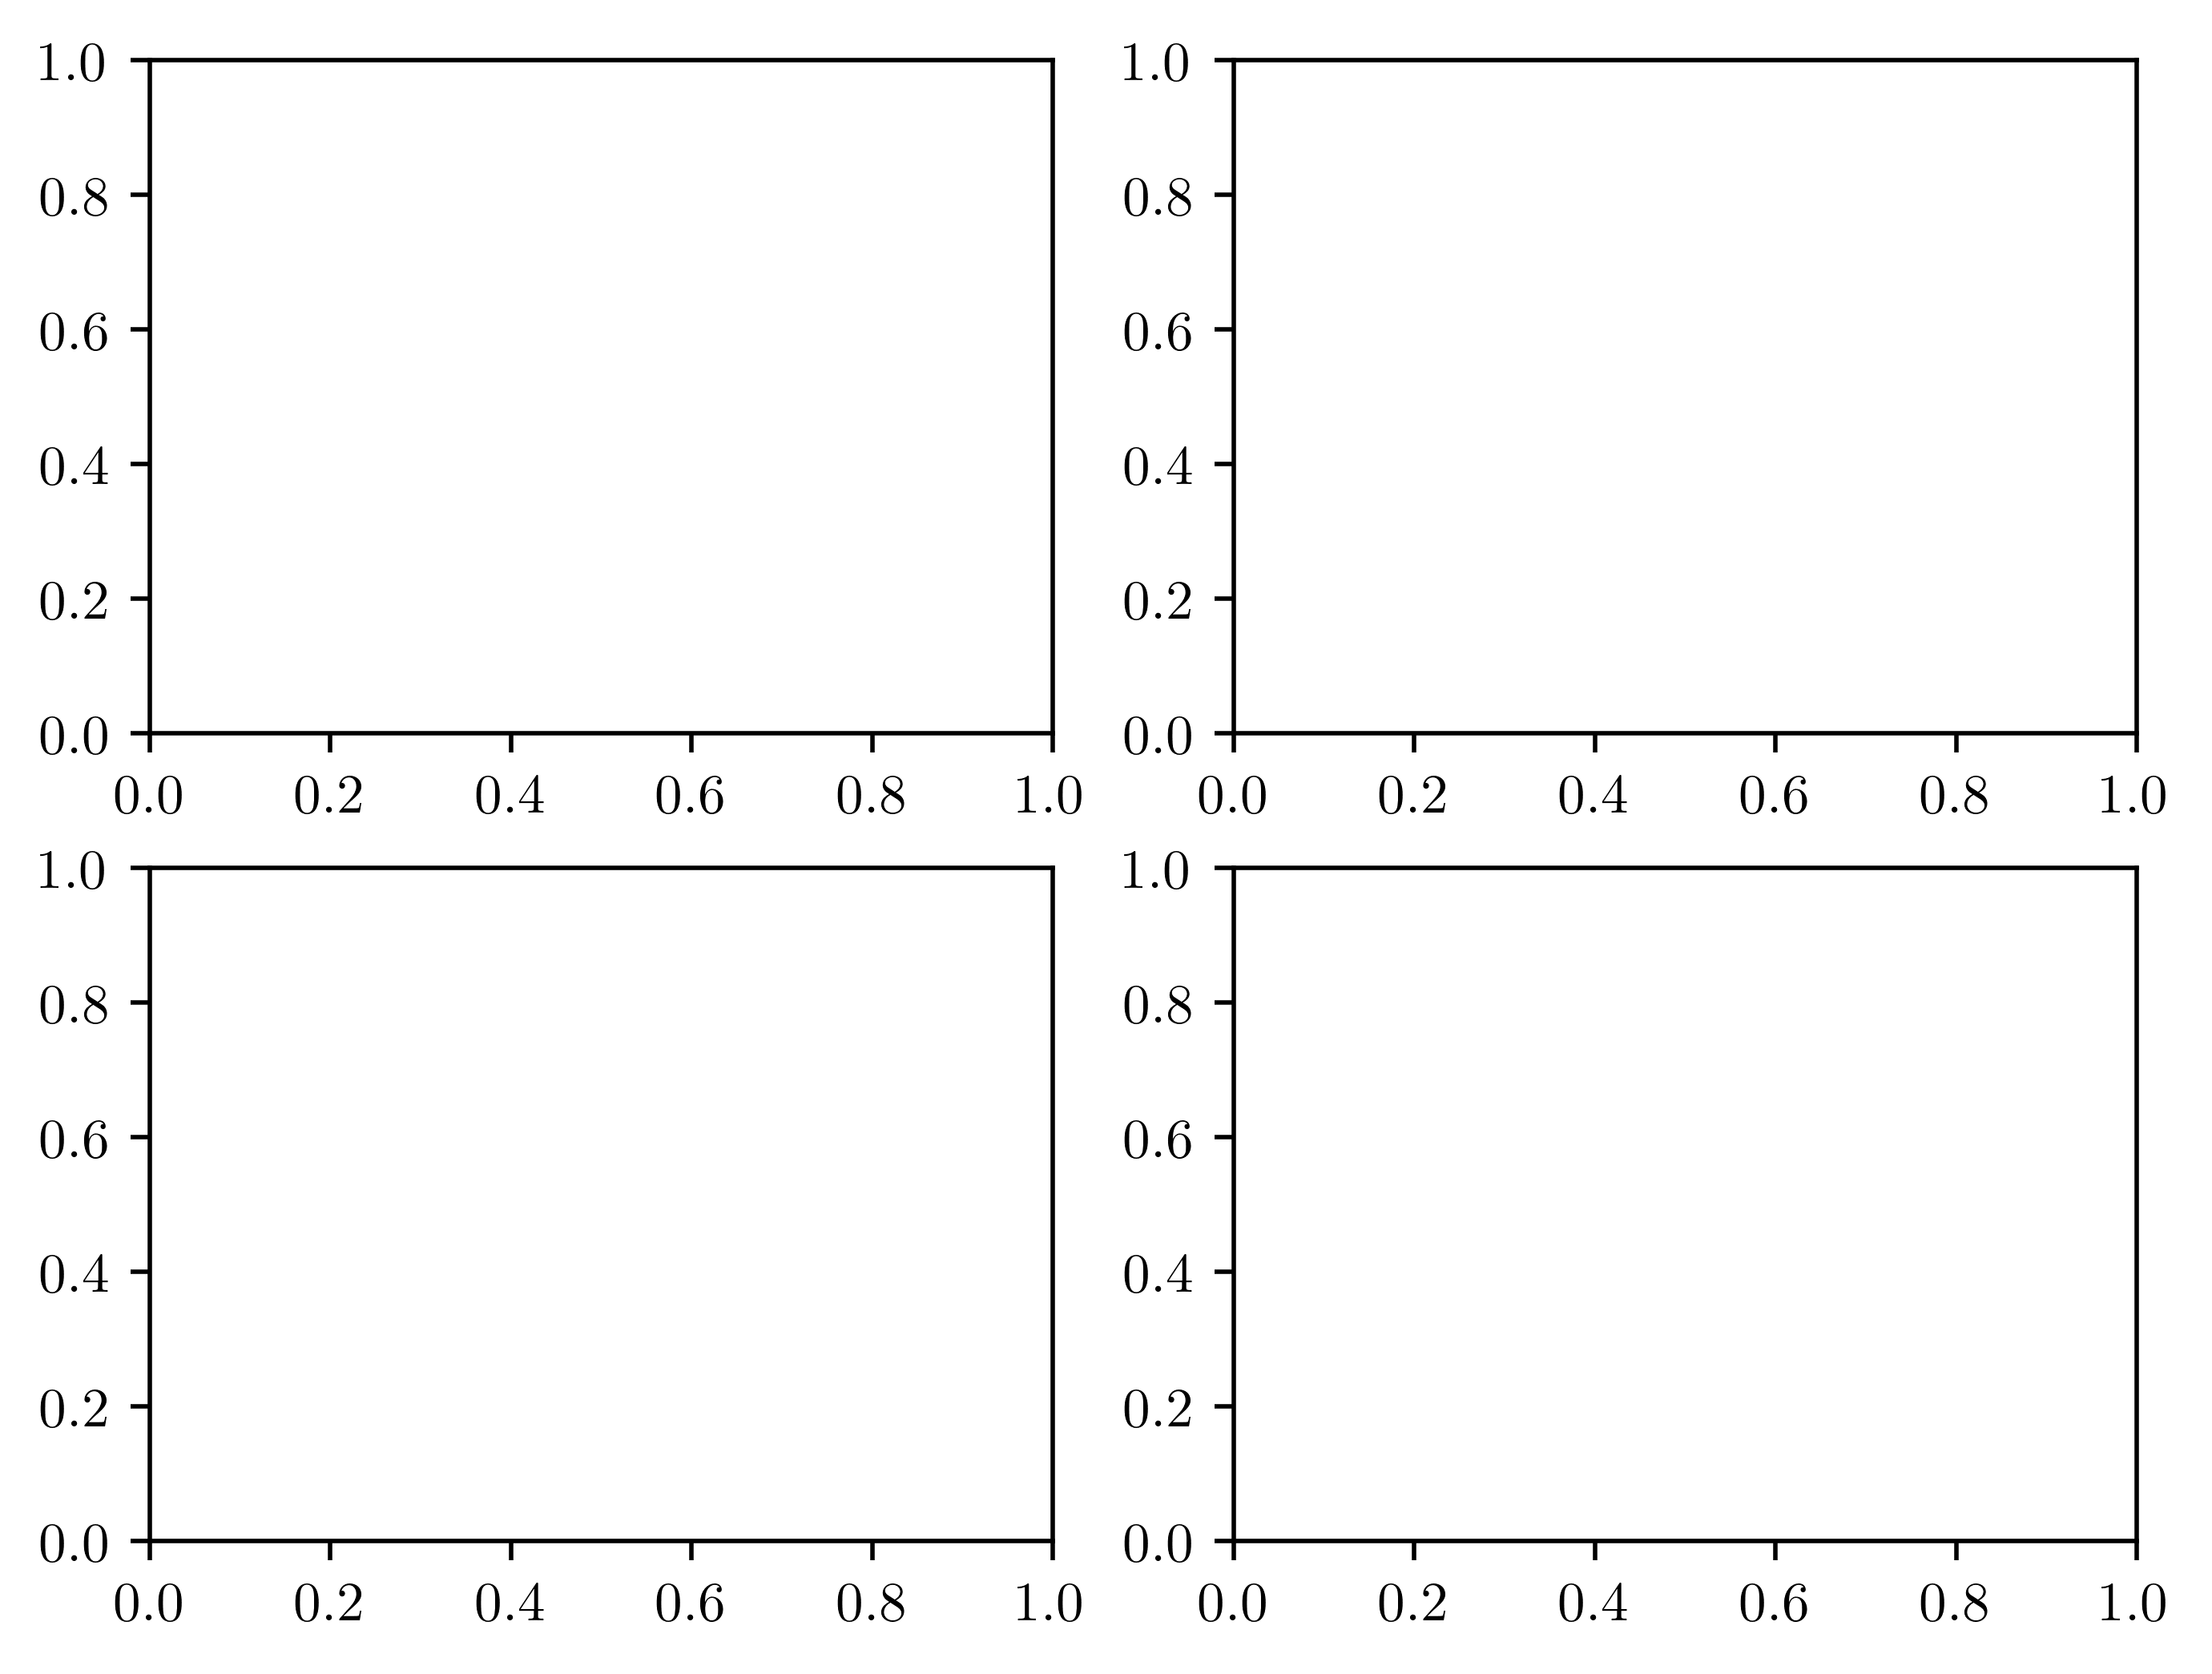

In [ ]:
fig, axes = plt.subplots(2, 2, dpi=500)
rd_visualizer = MOResultsVisualizer('rm', rm_prm_results['results']['rm-default'], label_fontsize=8, title_fontsize=9)
rd_visualizer.plot_theta_checkerboard(axes[1, 0], plt, -1, cbar_shrink=0.9)
axes[1, 0].text(-0.2, 1.1, r'(\textbf{d})', transform=axes[1, 0].transAxes, size=10)
rd_visualizer.plot_error(axes[0, 0], plt, -1, clim=(0, 0.1), cbar_shrink=0.9)
axes[0, 0].text(-0.2, 1.1, r'(\textbf{b})', transform=axes[0, 0].transAxes, size=10)
cgrd_visualizer = MOResultsVisualizer('prm', rm_prm_results['results']['prm-default'], label_fontsize=8, title_fontsize=9)
cgrd_visualizer.plot_theta_checkerboard(axes[1, 1], plt, -1, cbar_shrink=0.9)
axes[1, 1].text(-0.2, 1.1, r'(\textbf{e})', transform=axes[1, 1].transAxes, size=10)
cgrd_visualizer.plot_error(axes[0, 1], plt, -1, clim=(0, 0.1), cbar_shrink=0.9)
axes[0, 1].text(-0.2, 1.1, r'(\textbf{c})', transform=axes[0, 1].transAxes, size=10)
plt.subplots_adjust(top=1, right=0.8)
plt.savefig('data/figures/6b_rm_prm_data.pdf', bbox_inches='tight', pad_inches=0.02)

![Figure 6b: Deney Sonuçları](image/figure6b.png)


## Deney 2: Redundancy (RRM) ekleyin ([Şekil 7 ve Şekil 10](https://arxiv.org/pdf/1808.00458))

Redundant dikdörtgen ağlar (RRM), dikdörtgen ağa basitçe dikey katmanlar eklemeyi içerir. Bu deney, bir NVIDIA GTX1080 GPU üzerinde yaklaşık 3 saat sürmektedir.


### Experiment


In [ ]:
if RUN_OPTIMIZATION:
    layers = [
        RM(N, N + N // 8), RM(N, N + N // 4), RM(N, N + N // 2), RM(N, 2 * N), RM(N, 2 * N, bs_error=0.1)
    ]

    layer_names = [
        "rrm-16-default", "rrm-32-default", "rrm-64-default", "rrm-128-default", "rrm-128-error"
    ]

    mr = LinearMultiModelRunner(experiment_name=f"rrm-{N}",
                                layer_names=layer_names,
                                layers=layers,
                                optimizer=tf.keras.optimizers.Adam(lr=0.0025),
                                batch_size=2 * N,
                                iterations_per_epoch=100,
                                iterations_per_tb_update=5,
                                logdir="/data/tensorboard/neurophox/")

    mr.run(200, target, pbar)
    mr.save("data/")

with open('data/rrm-128.p', 'rb') as f:
    rrm_results = pickle.load(f)

NameError: name 'RUN_OPTIMIZATION' is not defined

### Plotting (Figure 7)


In [ ]:
plt.figure(dpi=200)
plt.plot(200 * np.arange(100), np.asarray(rm_prm_results['losses']['rm-default'][::200]), color=[0.7, 0, 0])
plt.plot(200 * np.arange(100), np.asarray(rm_prm_results['losses']['prm-default'][::200]), color=[0, 0.4, 0])
linestyles = [':', '--', '-.']
for i, name in enumerate(rrm_results['losses']):
    if 'random' in name:
        linestyle = 'dotted'
    elif 'photonic' in name:
        linestyle = '--'
    else:
        linestyle = '-'
    if 'cgrd' in name:
        color=[0, 0.4, 0]
    elif 'rd' in name:
        color=[0.7, 0, 0]
    if '128' not in name:
        plt.plot(200 * np.arange(100), np.asarray(rrm_results['losses'][name][::200]), linestyle=linestyles[i], color=[0.4, 0, 0.6])
    elif 'error' not in name:
        plt.plot(200 * np.arange(13), np.asarray(rrm_results['losses'][name][::200][:13]), color=[0.4, 0, 0.6])
plt.xlabel('Iteration')
plt.ylabel(r'Mean square error cost: $\frac{1}{2N}\left\lVert\hat U - U\right\rVert_F^2$')
plt.legend([r'\textbf{RM}', r'\textbf{PRM}', r'\textbf{RRM}: $\delta N = 16$',
            r'\textbf{RRM}: $\delta N = 32$', r'\textbf{RRM}: $\delta N = 64$',
            r'\textbf{RRM}: $\delta N = 128$'], ncol=2, fontsize=8)
plt.yscale('log')
plt.savefig('data/figures/7_rrm_optimization.pdf', bbox_inches='tight', pad_inches=0.05)

NameError: name 'plt' is not defined

![Figure 7: Deney Sonuçları](image/figure7.png)


### Plotting (Figure 10)


In [ ]:
plt.figure(dpi=200)
plt.plot(100 * np.arange(25), np.asarray(rrm_results['losses']['rrm-128-default'][::100][:25]), color=[0.4, 0, 0.6])
plt.plot(100 * np.arange(25), np.asarray(rrm_results['losses']['rrm-128-error'][::100][:25]), color=[0.4, 0, 0.6], linestyle='--')
plt.xlabel('Iteration')
plt.yscale('log')
plt.ylabel(r'Mean square error cost: $\frac{1}{2N}\left\lVert\hat U - U\right\rVert_F^2$')
plt.legend([r'\textbf{RRM} ($\sigma_\epsilon = 0$)', r'\textbf{RRM} ($\sigma_\epsilon = 0.1$)'])
plt.savefig('data/figures/10_rrm_error_optimization.pdf', bbox_inches='tight', pad_inches=0.05)

NameError: name 'plt' is not defined

![Figure 10: Deney Sonuçları](image/figure10.png)


## Deney 3: SVD Katmanları ([Şekil 11](https://arxiv.org/pdf/1808.00458))

Bu deney, bir NVIDIA GTX1080 GPU üzerinde yaklaşık 3,5 saat sürmektedir. Üniter matrisler için PRM ve RM modelleri arasında gözlemlenen farkın, standart normal kompleks değerli elemanlardan oluşan rastgele bir matrisin SVD optimizasyonu ile önemli ölçüde azaldığını buluyoruz.


### Experiment


In [ ]:
N = 64
target = np.random.randn(N, N) + 1j * np.random.randn(N, N)
if RUN_OPTIMIZATION:
    layers = [
        SVD(N, mesh_dict={"name": "rm"}),
        SVD(N, mesh_dict={"name": "rm", "properties":{"bs_error": 0.1}}),
        SVD(N, mesh_dict={"name": "rm", "properties":{"theta_init_name": "random_theta"}}),
        SVD(N, mesh_dict={"name": "prm"}),
        SVD(N, mesh_dict={"name": "prm", "properties":{"bs_error": 0.1}}),
        SVD(N, mesh_dict={"name": "prm", "properties":{"theta_init_name": "random_theta"}})
    ]

    layer_names = [
        "svdrm-default", "svdrm-error", "svdrm-rand", "svdprm-default", "svdprm-error", "svdprm-rand"
    ]

    mr = LinearMultiModelRunner(experiment_name=f"svd-{N}",
                                layer_names=layer_names,
                                layers=layers,
                                optimizer=tf.keras.optimizers.Adam(lr=0.005),
                                batch_size=2 * N,
                                iterations_per_epoch=100,
                                iterations_per_tb_update=5,
                                logdir="/data/tensorboard/neurophox/")

    mr.run(200, target, pbar)
    mr.save("data/")

with open('data/svd-64.p', 'rb') as f:
    svd_results = pickle.load(f)

NameError: name 'np' is not defined

### Plotting (Figure 11)


In [ ]:
plt.figure(dpi=200)

# this interestingly is usually close to 2 based on target defined above (so we assume that )
# normalized_value = np.sum(np.abs(target) ** 2) / N  
normalized_value = 2

for name in ("svdrm-default", "svdprm-default", "svdrm-error", "svdprm-error", "svdrm-rand", "svdprm-rand"):
    if 'rand' in name:
        linestyle = 'dotted'
    elif 'error' in name:
        linestyle = '--'
    else:
        linestyle = '-'
    if 'prm' in name:
        color=[0, 0.4, 0]
    elif 'rm' in name:
        color=[0.7, 0, 0]
    plt.plot(np.arange(200) * 100, np.asarray(svd_results['losses'][name][::100]) / normalized_value, linestyle=linestyle, color=color)
plt.xlabel('Iteration')
plt.ylabel(r'Mean square error cost: $\frac{1}{2\|A\|_F^2} \left\lVert\hat A - A\right\rVert_F^2$')
plt.yscale('log')
plt.legend([r'\textbf{SVD-RM}', r'\textbf{SVD-PRM}',
            r'\textbf{SVD-RM} ($\sigma_\epsilon = 0.1$)',
            r'\textbf{SVD-PRM} ($\sigma_\epsilon = 0.1$)',
            r'\textbf{SVD-RM} (uniform $\theta_{n\ell}$ init)',
            r'\textbf{SVD-PRM} (uniform $\theta_{n\ell}$ init)'], ncol=3, fontsize=7.5)
plt.savefig('data/figures/11_svd_optimization.pdf', bbox_inches='tight', pad_inches=0.02)

NameError: name 'plt' is not defined

![Figure 11: Deney Sonuçları](image/figure11.png)


## Tensorboard ile Görselleştirin!

Optimizasyon kayıplarını gerçek zamanlı olarak takip etmek için `tensorboard`u not defterinize yerleştirmeniz mümkündür. Bu, deneylerinizi yürütürken bir doğruluk kontrolü işlevi görür. (Iframe'i görmek için bu hücreyi iki kez çalıştırmanız gerekebilir.)


In [ ]:
%load_ext tensorboard
%tensorboard --logdir /data/tensorboard/neurophox

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2024-12-10 07:23:27.311116: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-10 07:23:31.207231: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\cumon\Desktop\Neurophox\env\Scripts\tensorboard.exe\__main__.py", line 7, in <module>
  File "C:\Users\cumon\Desktop\Neurophox\env\Lib\site-packages\tensorboard\main.py", line 41, in

## Deney 1 için Daha Fazla Grafik ([Şekil 12](https://arxiv.org/pdf/1808.00458))

**Ön Koşul:** Deney 1 verilerini yükleyin veya yukarıdaki ilgili kodu çalıştırarak pickle dosyası sonuçlarını elde edin.


In [ ]:
def plot_results(name, filename, title):
    sun_results_visualizer = MOResultsVisualizer(name, rm_prm_results['results'][name])
    sun_results_visualizer.plot_meaningful_snapshot(plt, -1, cbar_shrink=0.9)
    plt.suptitle(title, fontsize=10, horizontalalignment='center', x=0.1, y=1.05)
    plt.subplots_adjust(top=0.95, right=1.1)
    plt.tight_layout(rect=[-0.3, 0.03, 0.45, 1])
    plt.savefig(f'data/figures/{filename}.pdf', bbox_inches='tight', pad_inches=0.05)
plot_results('rm-default', '12a_sun_rm', r'\textbf{RM} ($\sigma_\epsilon = 0$, Haar $\theta_{n\ell}$ init)')
plot_results('prm-default', '12b_sun_prm', r'\textbf{PRM} ($\sigma_\epsilon = 0$, Haar $\theta_{n\ell}$ init)')
plot_results('rm-error', '12c_sun_rm_error', r'\textbf{RM} ($\sigma_\epsilon = 0.1$, Haar $\theta_{n\ell}$ init)')
plot_results('prm-error', '12d_sun_prm_error', r'\textbf{PRM} ($\sigma_\epsilon = 0.1$, Haar $\theta_{n\ell}$ init)')
plot_results('rm-rand', '12e_sun_rm_random', r'\textbf{RM} ($\sigma_\epsilon = 0$, uniform-random $\theta_{n\ell}$ init)')
plot_results('prm-rand', '12f_sun_prm_random', r'\textbf{PRM} ($\sigma_\epsilon = 0$, uniform-random $\theta_{n\ell}$ init)')

NameError: name 'MOResultsVisualizer' is not defined

![Figure 12: Deney Sonuçları](image/figure12a.png)


![Figure 12: Deney Sonuçları](image/figure12b.png)


![Figure 12: Deney Sonuçları](image/figure12c.png)


## Optimizasyonu Analiz Etmek için [Videolar](https://av.tib.eu/series/520/photonic+optimization) Oluşturun

**Ön Koşul:** Deney 1 verilerini yükleyin veya yukarıdaki ilgili kodu çalıştırarak pickle dosyası sonuçlarını elde edin.


In [ ]:
def plot_movie(name, title):
    sun_results_visualizer = MOResultsVisualizer(name, rm_prm_results['results'][name])
    sun_results_visualizer.plot_movie(plt, title, save_path='data/movies/', pbar_handle=pbar)
plot_movie('rm-default', r'\textbf{Rectangular Mesh} ($\sigma_\epsilon = 0$, Haar $\theta_{n\ell}$ init)')
plot_movie('prm-default', r'\textbf{Permuting Rectangular Mesh} ($\sigma_\epsilon = 0$, Haar $\theta_{n\ell}$ init)')
plot_movie('rm-error', r'\textbf{Rectangular Mesh} ($\sigma_\epsilon = 0.1$, Haar $\theta_{n\ell}$ init)')
plot_movie('prm-error', r'\textbf{Permuting Rectangular Mesh} ($\sigma_\epsilon = 0.1$, Haar $\theta_{n\ell}$ init)')
plot_movie('rm-rand', r'\textbf{Rectangular Mesh} ($\sigma_\epsilon = 0$, uniform-random $\theta_{n\ell}$ init)')
plot_movie('prm-rand', r'\textbf{Permuting Rectangular Mesh} ($\sigma_\epsilon = 0$, uniform-random $\theta_{n\ell}$ init)')

NameError: name 'MOResultsVisualizer' is not defined

In [ ]:
def get_theta_distribution(alpha: int=1, num_thetas: int=10000, override_uniform: bool=False):
    thetas = np.linspace(0, np.pi / 2, num_thetas)
    theta_vals = np.linspace(0, np.pi, num_thetas)
    if not override_uniform:
        theta_freqs = alpha * np.sin(thetas) * np.power(np.cos(thetas), 2 * alpha - 1)
    else:
        theta_freqs = np.pad(np.ones(int(num_thetas - 2)), ((1, 1),), 'constant') * 1 / np.pi
    return theta_vals, theta_freqs

prm_viz = MOResultsVisualizer('prm-default', rm_prm_results['results']['prm-default'],
                              title_fontsize=12, label_fontsize=10)
rm_viz = MOResultsVisualizer('rm-default', rm_prm_results['results']['rm-default'],
                             title_fontsize=12, label_fontsize=10)

plt.figure(dpi=500)
plt.plot(*(get_theta_distribution(9)), color=[0, 0.4, 0], linestyle='--')
plt.plot(*(get_theta_distribution(43)), color=[0.7, 0, 0], linestyle='--')
prm_viz.plot_thetas(plt.axes(), -1, color=[0, 0.4, 0], alpha=0.7)
rm_viz.plot_thetas(plt.axes(), -1, color=[0.7, 0, 0], alpha=0.7)
plt.legend([r'$\mathcal{P}_9(\theta_{n\ell} / 2)$',
            r'$\mathcal{P}_{43}(\theta_{n\ell} / 2)$',
            r'\textbf{PRM} ($N = 128$)', r'\textbf{RM} ($N = 128$)'])
plt.savefig('data/figures/13_rm_prm_distributions.pdf', bbox_inches='tight', pad_inches=0.02)

NameError: name 'MOResultsVisualizer' is not defined

# UnitaryML


## **Düzlemsel Veri Kümelemeleri İçin Üniter Makine Öğrenimi**

`Neurophox` modellerinin küçük makine öğrenimi problemlerinde nasıl kullanılabileceğini göstermek için, `neurophox.tensorflow` modülündeki `RM` sınıfını kullanarak Tensorflow 2 ile bazı küçük ikili sınıflandırma modelleri oluşturabiliriz. `sklearn` çerçevesi tarafından sağlanan birkaç basit ikili sınıflandırma problemine çözüm getireceğiz (not: bu not defterini kullanabilmek için `sklearn`'ü yüklemeniz gerekecek!): `circles`, `moons`, `gaussian_quantiles`, `blobs`.


In [46]:
# tensorflow imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Lambda

# neurophox imports
from neurophox.tensorflow import RM
from neurophox.ml import cnorm, cnormsq

# other python / plotting imports
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as pbar
from collections import namedtuple

# comment out the below two lines if you have trouble getting the plots to work
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'serif','serif':['Charter']})
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import interact

from sklearn.datasets import make_circles, make_moons, make_blobs, make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [47]:
def add_bias(x, p=10):
    abs_sq_term = np.sum(x**2, axis=1)[:, np.newaxis]
    abs_sq_term[abs_sq_term > p] = p  # avoid nan in case it exists
    normalized_bias_term = np.sqrt(p - abs_sq_term)
    return np.hstack([x, normalized_bias_term])

## Veri ve Grafik Kurulumu

Tüm düzlemsel veriler, 3 değerle temsil edilir: ilk iki değer $x, y$ koordinatlarıdır ve son değer, `add_bias` metodu tarafından belirlenen toplam güç $P = 10$ göz önüne alındığında gereken büyüklük $\sqrt{P - x^2 - y^2}$'dir. Bu nedenle, uygun `sklearn` veri setlerini alır ve bunları `add_bias` kullanarak dönüştürürüz, böylece test ve eğitim setlerimizi elde ederiz. Ardından, tüm veri setleri için %80 eğitim / %20 test bölmesi yaparız ve eğitim ve değerlendirme metriklerimizi oluştururuz (son grafiklerde ise aslında tüm veri seti üzerinde sınıflandırmaya bakarız).


In [48]:
# X has shape (n_features, n_samples), y has true labels, (n_features, n_samples)
Dataset = namedtuple('Dataset', ['X', 'y'])

def get_planar_dataset_with_circular_bias(dataset_name, test_size=.2):
    if dataset_name == 'moons':
        X, y = make_moons(noise=0.3, random_state=0, n_samples=250)
    elif dataset_name == 'circle':
        X, y = make_circles(noise=0.2, factor=0.5, random_state=1, n_samples=250)
    elif dataset_name == 'blobs':
        X, y = make_blobs(random_state=5, n_features=2,
                          centers=[(-0.4, -0.4), (0.25, 0.3)],
                          cluster_std=0.5, n_samples=250)
    elif dataset_name == 'ring':
        X, y = make_gaussian_quantiles(n_features=2, n_classes=3, n_samples=500, cov=0.4)
        y[y==2] = 0
    y = to_categorical(y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    X_train_f = add_bias(X_train).astype(np.complex64)
    X_test_f = add_bias(X_test).astype(np.complex64)
    y_train_f = y_train.astype(np.complex64)
    y_test_f = y_test.astype(np.complex64)
    
    return Dataset(X, y), Dataset(X_train_f, y_train_f), Dataset(X_test_f, y_test_f)

moons, moons_train, moons_test = get_planar_dataset_with_circular_bias('moons')
circle, circle_train, circle_test = get_planar_dataset_with_circular_bias('circle')
blobs, blobs_train, blobs_test = get_planar_dataset_with_circular_bias('blobs')
ring, ring_train, ring_test = get_planar_dataset_with_circular_bias('ring')

In [49]:
def cmap_map(function, cmap):
    """ Applies function (which should operate on vectors of shape 3: [r, g, b]), on colormap cmap.
    This routine will break any discontinuous points in a colormap.
    """
    cdict = cmap._segmentdata
    step_dict = {}
    # Firt get the list of points where the segments start or end
    for key in ('red', 'green', 'blue'):
        step_dict[key] = list(map(lambda x: x[0], cdict[key]))
    step_list = sum(step_dict.values(), [])
    step_list = np.array(list(set(step_list)))
    # Then compute the LUT, and apply the function to the LUT
    reduced_cmap = lambda step : np.array(cmap(step)[0:3])
    old_LUT = np.array(list(map(reduced_cmap, step_list)))
    new_LUT = np.array(list(map(function, old_LUT)))
    # Now try to make a minimal segment definition of the new LUT
    cdict = {}
    for i, key in enumerate(['red','green','blue']):
        this_cdict = {}
        for j, step in enumerate(step_list):
            if step in step_dict[key]:
                this_cdict[step] = new_LUT[j, i]
            elif new_LUT[j,i] != old_LUT[j, i]:
                this_cdict[step] = new_LUT[j, i]
        colorvector = list(map(lambda x: x + (x[1], ), this_cdict.items()))
        colorvector.sort()
        cdict[key] = colorvector

    return matplotlib.colors.LinearSegmentedColormap('colormap',cdict,1024)

light_rdbu = cmap_map(lambda x: 0.5 * x + 0.5, plt.cm.RdBu)
dark_bwr = cmap_map(lambda x: 0.75 * x, plt.cm.bwr)

def plot_planar_boundary(plt, dataset, model, ax=None, grid_points=50):   
    if ax is None:
        ax = plt.axes()
    x_min, y_min = -2.5, -2.5
    x_max, y_max = 2.5, 2.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_points), np.linspace(x_min, x_max, grid_points))

    # Predict the function value for the whole grid
    inputs = []
    for x, y in zip(xx.flatten(), yy.flatten()):
        inputs.append([x, y])
    inputs = add_bias(np.asarray(inputs))

    Y_hat = model.predict(inputs)
    Y_hat = [yhat[0] for yhat in Y_hat]
    Z = np.array(Y_hat)
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plot_handle = ax.contourf(xx, yy, Z, 50, cmap=light_rdbu, linewidths=0)
    cbar = plt.colorbar(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1], mappable=plot_handle, ax=ax)
    cbar.set_clim((0, 1))

    points_x = dataset.X.T[0,:]
    points_y = dataset.X.T[1,:]
    labels = np.array([0 if yi[0] > yi[1] else 1 for yi in np.abs(dataset.y)]).flatten()

    ax.set_ylabel(r'$x_2$', fontsize=16)
    ax.set_xlabel(r'$x_1$', fontsize=16)

    ax.scatter(points_x, points_y, c=labels, edgecolors='black', linewidths=0.1, s=10, cmap=dark_bwr)

## Circles model


In [50]:
circles_model = Sequential([
    RM(3, activation=Activation(cnorm)),
    RM(3, activation=Activation(cnorm)),
    RM(3, activation=Activation(cnorm)),
    Activation(cnormsq),
    Lambda(lambda x: tf.math.real(x[:, :2])), # get first 2 output ports (we already know it is real from the activation),
    Activation('softmax')
])

In [ ]:
num_iterations = 3000

circles_test_losses = []
circles_model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.0025))
iterator = pbar(range(num_iterations))
for iteration in iterator:
    test_loss = circles_model.evaluate(circle_test.X, circle_test.y, verbose=0)
    circles_model.train_on_batch(circle_train.X, circle_train.y)
    circles_test_losses.append(test_loss)
    iterator.set_description(f"𝓛: {test_loss:.5f}")
plt.figure(figsize=(7, 6), dpi=200)
plot_planar_boundary(plt, circle, circles_model)

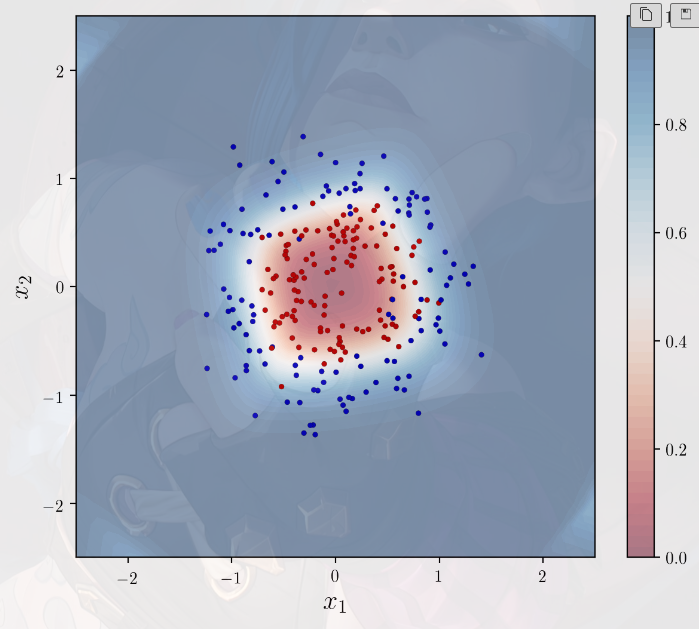


## Moons model


In [51]:
moons_model = Sequential([
    RM(3, activation=Activation(cnorm)),
    RM(3, activation=Activation(cnorm)),
    RM(3, activation=Activation(cnorm)),
    Activation(cnormsq),
    Lambda(lambda x: tf.math.real(x[:, :2])), # get first 2 output ports (we already know it is real from the activation),
    Activation('softmax')
])

In [ ]:
num_iterations = 4000

moons_test_losses = []
moons_model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.0025))
iterator = pbar(range(num_iterations))
for iteration in iterator:
    test_loss = moons_model.evaluate(moons_test.X, moons_test.y, verbose=0)
    moons_model.train_on_batch(moons_train.X, moons_train.y)
    moons_test_losses.append(test_loss)
    iterator.set_description(f"𝓛: {test_loss:.5f}")
plt.figure(figsize=(7, 6), dpi=200)
plot_planar_boundary(plt, moons, moons_model)

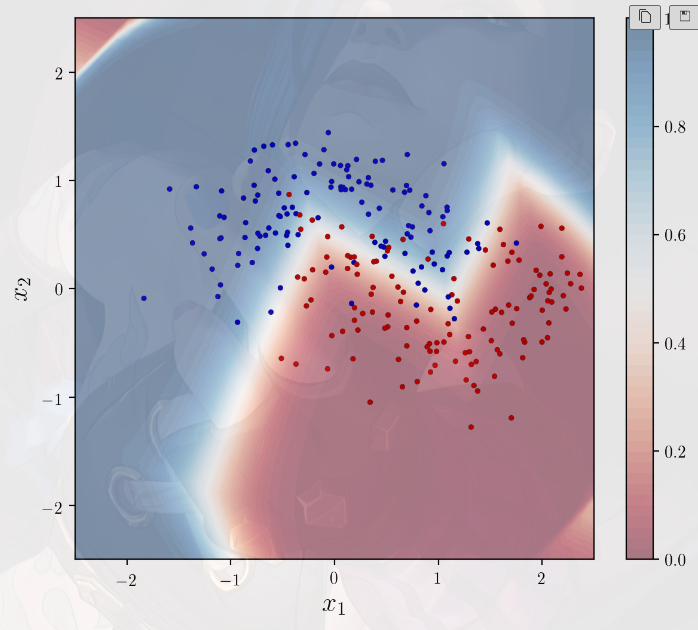


## Blobs model


In [52]:
blobs_model = Sequential([
    RM(3, activation=Activation(cnorm)),
    RM(3, activation=Activation(cnorm)),
    RM(3, activation=Activation(cnorm)),
    Activation(cnormsq),
    Lambda(lambda x: tf.math.real(x[:, :2])), # get first 2 output ports (we already know it is real from the activation),
    Activation('softmax')
])

In [ ]:
num_iterations = 3000

blobs_test_losses = []
blobs_model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.0025))
iterator = pbar(range(num_iterations))
for iteration in iterator:
    test_loss = blobs_model.evaluate(blobs_test.X, blobs_test.y, verbose=0)
    blobs_model.train_on_batch(blobs_train.X, blobs_train.y)
    blobs_test_losses.append(test_loss)
    iterator.set_description(f"𝓛: {test_loss:.5f}")
plt.figure(figsize=(7, 6), dpi=200)
plot_planar_boundary(plt, blobs, blobs_model)

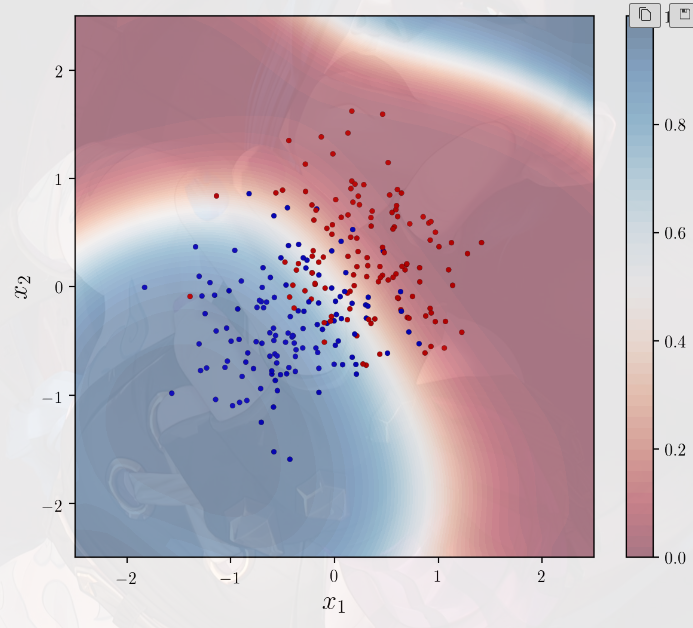


## Rings model

Not: Yüzük çoğu zaman bulunur, ancak başarısız olma ihtimali küçük bir yüzdeyle mümkündür (final kaybı başlangıçta 0.6 civarına kadar düşmeli ve eğer başarılı olursa yaklaşık 0.35 civarına ulaşmalıdır, ancak başarısız olursa 0.6 civarında kalır).


In [53]:
ring_model = Sequential([
    RM(3, activation=Activation(cnorm)),
    RM(3, activation=Activation(cnorm)),
    RM(3, activation=Activation(cnorm)),
    RM(3, activation=Activation(cnorm)),
    Activation(cnormsq),
    Lambda(lambda x: tf.math.real(x[:, :2])), # get first 2 output ports (we already know it is real from the activation),
    Activation('softmax')
])

In [ ]:
num_iterations = 5000

ring_test_losses = []
ring_model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.0025))
iterator = pbar(range(num_iterations))
for iteration in iterator:
    test_loss = ring_model.evaluate(ring_test.X, ring_test.y, verbose=0)
    ring_model.train_on_batch(ring_train.X, ring_train.y)
    ring_test_losses.append(test_loss)
    iterator.set_description(f"𝓛: {test_loss:.5f}")

## Result Comparison

Yukarıdaki tüm deneyler için performansları ve optimizasyon eğrilerini karşılaştırma.


TypeError: Exception encountered when calling RM.call().

[1mCould not automatically infer the output shape / dtype of 'rm_18' (of type RM). Either the `RM.call()` method is incorrect, or you need to implement the `RM.compute_output_spec() / compute_output_shape()` method. Error encountered:

in user code:

    File "c:\Users\cumon\Desktop\Neurophox\env\Lib\site-packages\neurophox\tensorflow\generic.py", line 492, in transform  *
        outputs = inputs * mesh_phases.input_phase_shift_layer if self.include_diagonal_phases else inputs

    TypeError: Input 'y' of 'Mul' Op has type complex64 that does not match type float32 of argument 'x'.
[0m

Arguments received by RM.call():
  • args=('<KerasTensor shape=(32, 3), dtype=float32, sparse=False, name=keras_tensor>',)
  • kwargs={'mask': 'None'}

<Figure size 1280x960 with 0 Axes>

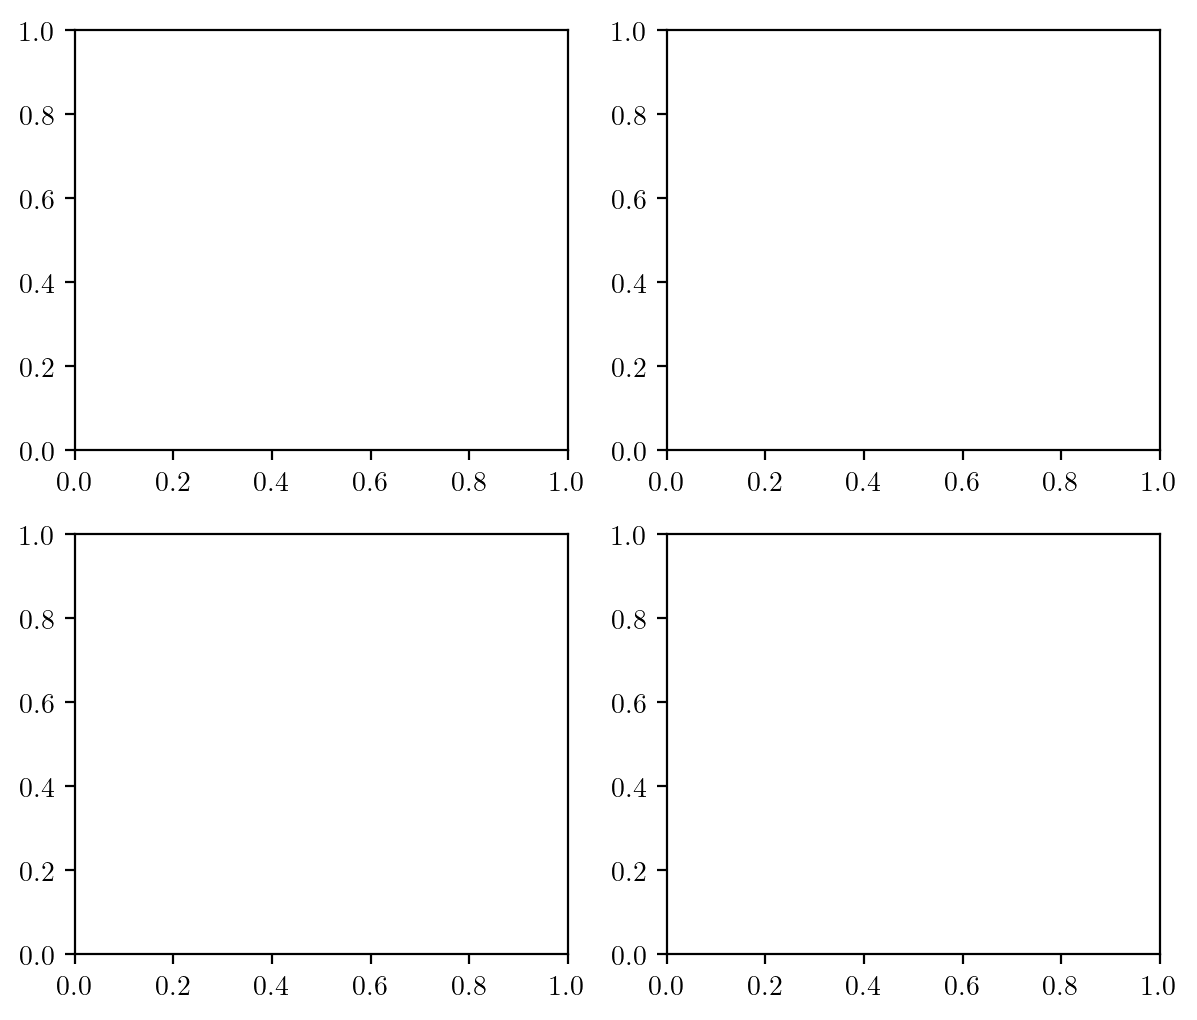

In [54]:
plt.figure(dpi=200)
fig, ax = plt.subplots(2, 2, figsize=(7, 6), dpi=200)
plot_planar_boundary(plt, circle, circles_model, ax=ax[0, 0])
ax[0, 0].set_title('Circle', fontsize=16)
plot_planar_boundary(plt, moons, moons_model, ax=ax[1, 0])
ax[1, 0].set_title('Moons', fontsize=16)
plot_planar_boundary(plt, blobs, blobs_model, ax=ax[0, 1])
ax[0, 1].set_title('Blobs', fontsize=16)
plot_planar_boundary(plt, ring, ring_model, ax=ax[1, 1])
ax[1, 1].set_title('Ring', fontsize=16)
plt.tight_layout()
# ax[0, 0].text(-0.3, 1.05, r'(\textbf{a})', transform=ax[0, 0].transAxes, size=20)
# plt.savefig('../data/figures/pnn_planar.pdf', bbox_inches='tight', pad_inches=0.01)

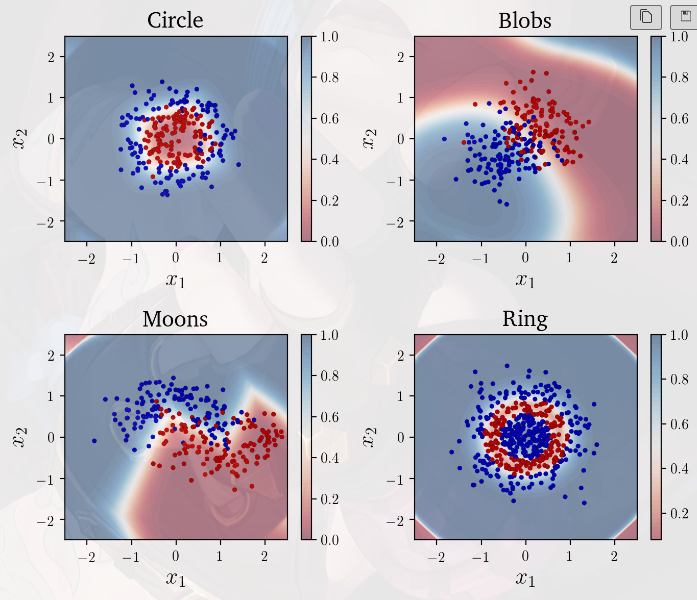


In [ ]:
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

plt.figure(dpi=200, figsize=(5, 2.5))
plt.plot(circles_test_losses)
plt.plot(blobs_test_losses)
plt.plot(moons_test_losses)
plt.plot(ring_test_losses)
plt.xlim((0, 3000))
plt.ylim((0, 1))
# plt.yticks([0.1, 0.2, 0.3, 0.4, 0.6, 1], [0.1, 0.2, 0.3, 0.4, 0.6, 1])
# plt.yscale('log')
plt.xlabel('Iteration ($t$)')
plt.ylabel(r'Cost ($\mathcal{L}$)')
plt.legend(['Circle', 'Blobs', 'Moons', 'Ring'])
plt.title('Planar Dataset Convergence')

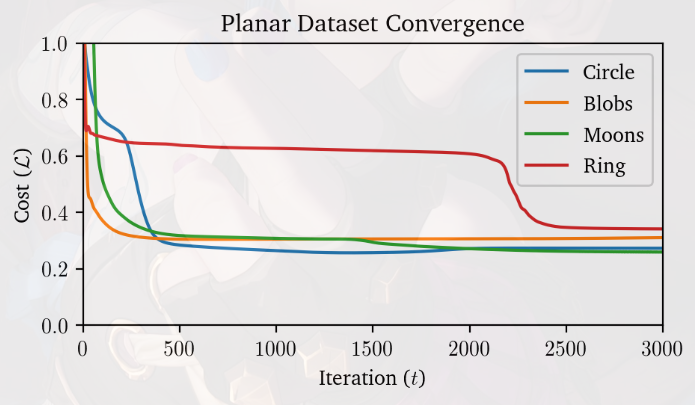


# TorchMNIST


In [56]:
from mnist import *
from viz import *

import torch
from torch.nn import Sequential, Module, CrossEntropyLoss
from torch.nn.functional import normalize
import numpy as np


from neurophox.torch import RMTorch
from scipy.stats import unitary_group
from tqdm import tqdm_notebook as pbar

import matplotlib.pyplot as plt
%matplotlib inline
# comment out the below two lines if you have trouble getting the plots to work
plt.rc('text', usetex=True)
import warnings
warnings.filterwarnings('ignore')

def rc_mul(real: torch.Tensor, comp: torch.Tensor):
    return real.unsqueeze(dim=0) * comp


def cc_mul(comp1: torch.Tensor, comp2: torch.Tensor) -> torch.Tensor:
    real = comp1[0] * comp2[0] - comp1[1] * comp2[1]
    comp = comp1[0] * comp2[1] + comp1[1] * comp2[0]
    return torch.stack((real, comp), dim=0)

def phasor(real: torch.Tensor):
    return torch.stack((real.cos(), real.sin()), dim=0)


def cnorm(comp: torch.Tensor):
    return (comp[0] ** 2 + comp[1] ** 2).sqrt()


def cnormsq(comp: torch.Tensor):
    return comp[0] ** 2 + comp[1] ** 2


def to_complex_t(nparray: np.ndarray):
    return torch.stack((torch.as_tensor(nparray.real),
                        torch.as_tensor(nparray.imag)), dim=0)


class ElectroopticNonlinearity(Module):
    def __init__(self, alpha: float=0.1, g: float=0.05 * np.pi, phi_b: float=np.pi):
        super(ElectroopticNonlinearity, self).__init__()
        self.alpha = alpha
        self.g = g
        self.phi_b = phi_b

    def forward(self, inputs):
        phase = 0.5 * self.g * cnormsq(inputs) + 0.5 * self.phi_b
        return np.sqrt(1 - self.alpha) * cc_mul(rc_mul(phase.cos(), phasor(-phase)), inputs)


class CNormSq(Module):
    def __init__(self, normed=True):
        super(CNormSq, self).__init__()
        self.normed = normed

    def forward(self, inputs):
        return normalize(cnormsq(inputs), dim=1) if self.normed else cnormsq(inputs)

## Fotonik Sinir Ağı Simülasyonu MNIST Üzerinde

Burada, bir fotonik sinir ağının MNIST problemine nasıl çözüm getirebileceğini, eğitim modülü olarak PyTorch kullanarak gösteriyoruz (TensorFlow yerine). Unutmayın ki eğitim hâlâ önemli ölçüde daha yavaş çünkü PyTorch, henüz karmaşık sayılar ve karmaşık sayılarla CUDA'yı desteklememektedir.


In [57]:
mnist_dp = MNISTDataProcessor()
data_N64 = mnist_dp.fourier(4)

In [ ]:
mnist_model = Sequential(
    RMTorch(64),
    ElectroopticNonlinearity(),
    RMTorch(64),
    ElectroopticNonlinearity(),
    CNormSq()
).cuda()

criterion = torch.nn.MSELoss(reduction='mean').cuda()
optimizer = torch.optim.Adam(mnist_model.parameters(), lr=1e-3)
n_epochs = 200
n_split = 100 # batch size is 60000 / n_split
test_losses = []
accuracies = []

for epoch in range(n_epochs):
    out = mnist_model(data_N64.x_test.astype(np.complex64))[:, :10]
    target_ind = torch.tensor(data_N64.y_test_ind, dtype=torch.long).cuda()
    target = torch.tensor(data_N64.y_test.astype(np.float32)).cuda()
    accuracy = (out.argmax(dim=1) == target_ind).sum().type(torch.DoubleTensor) / data_N64.y_test.shape[0]
    test_losses.append(criterion(out, target).item())
    accuracies.append(accuracy.item())
    print(f'Epoch {epoch} - Test loss: {test_loss.item()} - Accuracy: {accuracy.item()}')
    iterator = pbar(list(zip(np.split(data_N64.x_train, n_split), np.split(data_N64.y_train, n_split))))
    for x, y in iterator:
        loss = criterion(mnist_model(x.astype(np.complex64))[:, :10],
                         torch.tensor(y.astype(np.float32)).cuda())
        optimizer.zero_grad()
        loss.backward()
        iterator.set_description(f"𝓛: {loss:.5f}")
        optimizer.step()

In [ ]:
plt.figure(dpi=200)
plt.plot(1 - np.asarray(accuracies))
plt.ylabel('Percent Error')
plt.xlabel('Epochs')
plt.ylim((0, 0.1))
plt.title('Torch-MNIST Learning Curve')

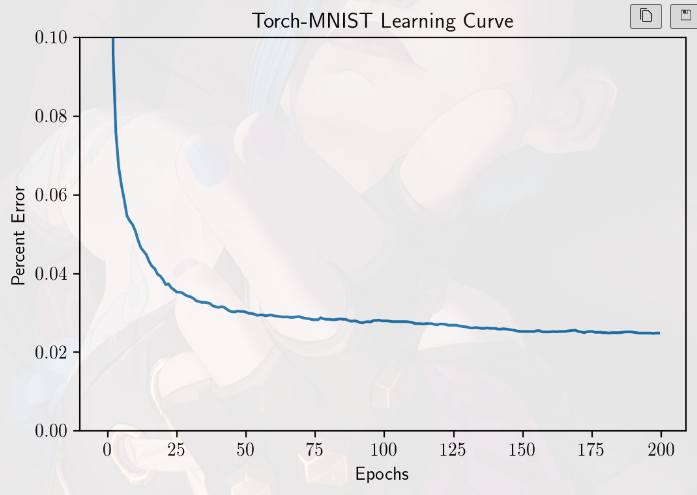


## PyTorch ile Matris Optimizasyonu

Burada, rastgele bir $128 \times 128$ ünite matrisini optimize eden dikdörtgen bir ağ katmanının nasıl optimize edileceğini gösteriyoruz.


In [ ]:
N = 128
layer = RMTorch(N).cuda()
target = to_complex_t(unitary_group.rvs(N)).cuda()
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(layer.parameters(), lr=5e-3)
n_iterations = 1000
loss_history = []
for t in pbar(range(n_iterations)):
    loss = criterion(layer(np.eye(N)), target) / (2 * N)
    optimizer.zero_grad()
    loss.backward()
    loss_history.append(loss.item())
    iterator.set_description(f"𝓛: {loss:.5f}")
    optimizer.step()

In [ ]:
plt.figure(dpi=200)
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')

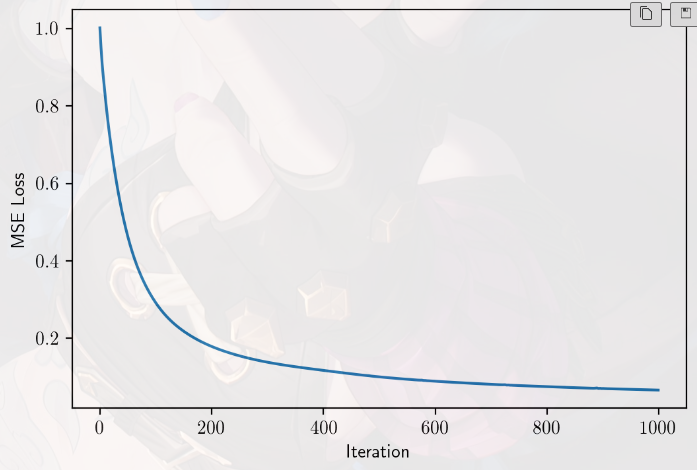


# MNIST


In [58]:
from mnist import *
from viz import *
import matplotlib as mpl
import matplotlib.pyplot as plt

# Uncomment if tex not installed

mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = r'\usepackage{siunitx} \n' \
                                      r'\usepackage{amsmath} \n' \
                                      r'\usepackage{sansmathfonts} \n' \
                                      r'\usepackage[T1]{fontenc} \n' \
                                      r'\renewcommand*\familydefault{\sfdefault}'

In [59]:
epochs = 200
batch_size = 512
N_classes = 10

In [60]:
mnist_dp = MNISTDataProcessor()

In [ ]:
# Initialize the data

data_N36 = mnist_dp.fourier(3)
data_N64 = mnist_dp.fourier(4)
data_N144 = mnist_dp.fourier(6)

# Initialize the models

model_eo_N36 = construct_onn_EO_tf_ortho(36)
model_eo_N36.compile(optimizer='adam',
                 loss='mse',
                 metrics=['accuracy'])
model_eo = construct_onn_EO_tf_ortho(64)
model_eo.compile(optimizer='adam',
                 loss='mse',
                 metrics=['accuracy'])
model_eo_N144 = construct_onn_EO_tf_ortho(144)
model_eo_N144.compile(optimizer='adam',
                 loss='mse',
                 metrics=['accuracy'])

In [ ]:
history_eo = model_eo.fit(data_N64.x_train,
                          data_N64.y_train,
                          epochs=epochs,
                          batch_size=batch_size,
                          validation_data=(data_N64.x_test, data_N64.y_test),
                          verbose=2)

model_eo_vars = [var.numpy() for var in model_eo.variables]

In [ ]:
history_eo_N144 = model_eo_N144.fit(data_N144.x_train,
                          data_N144.y_train,
                          epochs=epochs,
                          batch_size=batch_size,
                          validation_data=(data_N144.x_test, data_N144.y_test),
                          verbose=2)

model_eo_vars_N144 = [var.numpy() for var in model_eo_N144.variables]

In [ ]:
history_eo_N36 = model_eo_N36.fit(data_N36.x_train,
                                  data_N36.y_train,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  validation_data=(data_N36.x_test, data_N36.y_test),
                                  verbose=2)

model_eo_vars_N36 = [var.numpy() for var in model_eo_N36.variables]

In [ ]:
from tqdm import tqdm_notebook as pbar

possible_errors = [0.005 * i for i in range(20)]

def get_accuracies(model, model_vars, data):
    accuracies_for_errors = []
    accuracies_for_errors_t = []
    for e in pbar(possible_errors):
        for i in (0, 1, 2, 6, 7, 8):
            current_var = model_vars[i]
            model.variables[i].assign(current_var + e * np.random.randn(*current_var.shape))

        accuracies_for_errors.append(
            np.mean(tf.keras.metrics.categorical_accuracy(
                data.y_train, model.predict(data.x_train))))

        accuracies_for_errors_t.append(
            np.mean(tf.keras.metrics.categorical_accuracy(
                data.y_test, model.predict(data.x_test))))
    return accuracies_for_errors, accuracies_for_errors_t
    
accuracies_for_errors_N144, accuracies_for_errors_N144_t = get_accuracies(model_eo_N144, model_eo_vars_N144, data_N144)
accuracies_for_errors_N36, accuracies_for_errors_N36_t = get_accuracies(model_eo_N36, model_eo_vars_N36, data_N36)
accuracies_for_errors, accuracies_for_errors_t = get_accuracies(model_eo, model_eo_vars, data_N64)

In [ ]:
_, axes = plt.subplots(1, 2, figsize=(7, 3.5), dpi=300)

axes[0].plot(np.arange(40) * 5, history_eo_N144.history['accuracy'][::5], color=DARK_BLUE, linestyle='--')
axes[0].plot(np.arange(40) * 5, history_eo.history['accuracy'][::5], color=DARK_BLUE)
axes[0].plot(np.arange(40) * 5, history_eo_N36.history['accuracy'][::5], color=DARK_BLUE, linestyle=':')
axes[0].plot(np.arange(40) * 5, history_eo_N144.history['val_accuracy'][::5], color=DARK_GREEN, linestyle='--')
axes[0].plot(np.arange(40) * 5, history_eo.history['val_accuracy'][::5], color=DARK_GREEN)
axes[0].plot(np.arange(40) * 5, history_eo_N36.history['val_accuracy'][::5], color=DARK_GREEN, linestyle=':')
axes[0].set_xlabel('Epoch', fontsize=16)
axes[0].set_ylabel('Accuracy', fontsize=16)
axes[0].set_ylim((0.85, 1.01))
axes[0].set_title(r'\textbf{(a)}', loc='left', x=-.3, fontsize=18)
axes[0].set_title('MNIST training', fontsize=18)
axes[0].legend((r'Train, $N = 144$', r'Train, $N = 64$',
                r'Train, $N = 36$', r'Test, $N = 144$',
                r'Test, $N = 64$', r'Test, $N = 36$'), fontsize=11)
axes[0].tick_params(labelsize=14)


axes[1].plot(possible_errors, accuracies_for_errors_N144, linestyle='--', color=DARK_BLUE)
axes[1].plot(possible_errors, accuracies_for_errors, color=DARK_BLUE)
axes[1].plot(possible_errors, accuracies_for_errors_N36, linestyle=':', color=DARK_BLUE)
axes[1].plot(possible_errors, accuracies_for_errors_N144_t, linestyle='--', color=DARK_GREEN)
axes[1].plot(possible_errors, accuracies_for_errors_t, color=DARK_GREEN)
axes[1].plot(possible_errors, accuracies_for_errors_N36_t, linestyle=':', color=DARK_GREEN)

axes[1].set_xlabel(r'Phase Error ($\sigma_\theta, \sigma_\phi$)', fontsize=16)
axes[1].set_ylabel(r'Accuracy', fontsize=16)
axes[1].set_title(r'\textbf{(b)}', loc='left', x=-.3, fontsize=18)
axes[1].set_title('Robustness analysis', fontsize=18)
axes[1].set_ylim((0.64, 1.1))
axes[1].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
axes[1].set_xticks([0, 0.02, 0.04, 0.06, 0.08, 0.1])

axes[1].tick_params(labelsize=14)

plt.tight_layout()
plt.savefig('data/figures/nnanalysis.pdf', bbox_inches='tight', pad_inches=0.02)

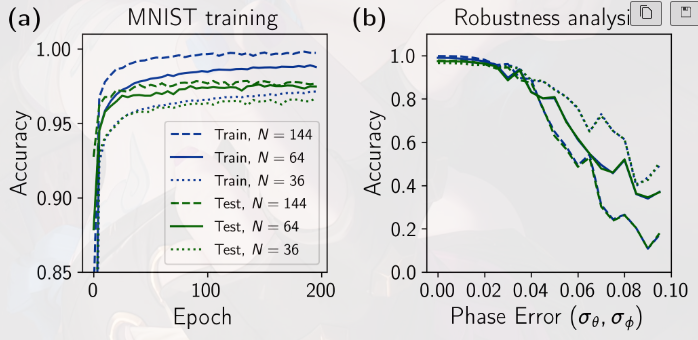


In [ ]:
std = np.sqrt(0.0025)
errors = []

inds_1 = [0, 1]
inds_2 = [6, 7]

for i in (0, 1, 2, 6, 7, 8):
    current_var = model_eo_vars[i]
    errors.append(std * np.random.randn(*current_var.shape))

accuracies = []    

N = 64

for n in pbar(range(N * 2 + 1)):
    if n <= 64:
        for i in (0, 1):
            error_mask = np.zeros_like(model_eo_vars[i])
            error_mask[n:] = 1
            model_eo.variables[i].assign(model_eo_vars[i] + errors[i] * error_mask)
    for i in (6, 7):
        if n >= 64:
            error_mask = np.zeros_like(model_eo_vars[i])
            error_mask[n - N:] = 1
        else:
            error_mask = np.ones_like(model_eo_vars[i])
        model_eo.variables[i].assign(model_eo_vars[i] + errors[i - 3] * error_mask)
    accuracies.append(
        np.mean(
            tf.keras.metrics.categorical_accuracy(data_N64.y_test, model_eo.predict(data_N64.x_test))
        )
    )

In [ ]:
_, axes = plt.subplots(1, 2, figsize=(7, 3), dpi=300)

title_fontsize = 18

axes[0].plot(history_eo.history['accuracy'], color=DARK_BLUE)
axes[0].plot(history_eo.history['val_accuracy'], color=DARK_GREEN)
axes[0].set_xlabel('Epoch', fontsize=title_fontsize-2)
axes[0].set_ylabel('Accuracy', fontsize=title_fontsize-2)
axes[0].legend(['Train', 'Test'], fontsize=title_fontsize-2)
axes[0].set_ylim((0.9, 1))
axes[0].set_title('MNIST training',y=1.1, fontsize=title_fontsize)
axes[0].set_yticks([0.9, 0.92, 0.94, 0.96, 0.98, 1.0])
axes[0].tick_params(labelsize=14)

axes[1].plot(accuracies, color=DARK_GREEN)
axes[1].plot(np.ones_like(accuracies) * accuracies[-1], color=DARK_RED, linestyle='--')
axes[1].arrow(0, accuracies[-1], 0, accuracies[0] - accuracies[-1] +0.02, color=DARK_RED,
              head_width=5, head_length=0.02, length_includes_head=True)
axes[1].text(x=16, y=0.9, s='Drift', color=DARK_RED,
             horizontalalignment='center', verticalalignment='center', fontsize=16)
axes[1].text(x=64, y=0.7, s='Programming', color=DARK_ORANGE,
             horizontalalignment='center', verticalalignment='center', fontsize=16)
axes[1].arrow(0, 0.675, 128, 0, color=DARK_ORANGE,
              head_width=0.02, head_length=5, length_includes_head=True)
axes[1].set_xlabel('Number of programmed layers', fontsize=title_fontsize-2)
axes[1].set_xticks([l * 32 for l in range(5)])
axes[1].set_yticks([0.7, 0.8, 0.9, 1.0])
axes[1].set_ylabel('Accuracy', fontsize=title_fontsize-2)
axes[1].set_title('Parallel nullification',y=1.1, fontsize=title_fontsize)
axes[1].set_ylim((0.65, 1))
axes[1].tick_params(labelsize=14)
plt.tight_layout()

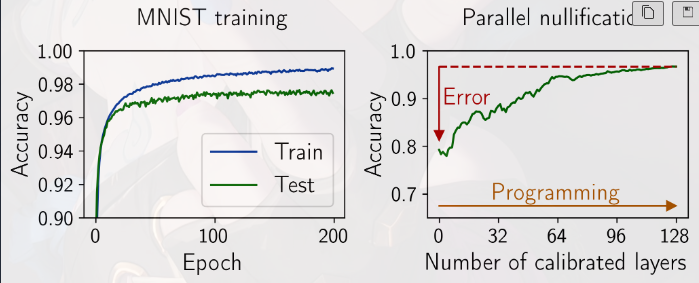
